# Statistical Analysis of the validity of FLI-P 

In this document, we provide the statistical analysis of insights derived from the work completed on the validity of the Functional Listening Index-Pediatric (FLI) at the Goodwill Analytics event in October of 2016. 

The Functional Listening Index – Paediatric (FLI) is a clinical assessment tool developed by The Shepherd Centre to assist in the early identification of potential barriers to language and communication development in children with hearing loss.

The FLI-P measures the acquisition of listening skills from the earliest skills from birth through to advanced listening skills required in the early school years. It is a 60 item checklist of listening skills administered by trained specialists in client's frequent therapy sessions.

In this project we investigated the validity of the tool from three perspectives: internal, concurrent and predictive validity. We show that the FLI demonstrates some evidence of all three forms of validity.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import qgrid # library to be able to scroll through dataframe like an excel file!

qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder

df = pd.read_excel('S:/Clinical/Information & Analysis/Reports and Analysis/Research/FLI-P Validation Project/TSC Final Datasets/14-10-2016 FLIP Final Data Extract_final.xlsx',
                  'Sheet1')

## The Dataset

In [2]:
# Explore the dataset
df.shape

(450, 100)

In [3]:
df.columns

Index(['PersonGUID', 'newbornhearingresult', 'BirthDateTime',
       'Child_Age_In_Months', 'age_group', 'age_in_months_at_last_update',
       'FLI_items_0_mths', 'FLI_items_3_mths', 'FLI_items_6_mths',
       'FLI_items_9_mths', 'FLI_items_12_mths', 'FLI_items_15_mths',
       'FLI_items_18_mths', 'FLI_items_21_mths', 'FLI_items_24_mths',
       'FLI_items_27_mths', 'FLI_items_30_mths', 'FLI_items_33_mths',
       'FLI_items_36_mths', 'FLI_items_39_mths', 'FLI_items_42_mths',
       'FLI_items_45_mths', 'FLI_items_48_mths', 'FLI_items_51_mths',
       'FLI_items_54_mths', 'FLI_items_57_mths', 'FLI_items_60_mths',
       'FLI_items_63_mths', 'FLI_items_66_mths', 'FLI_items_69_mths',
       'FLI_items_72_mths', 'FLI_items_75_mths', 'Total_FLI_Count',
       'best.tot.lang.at.3', 'best.tot.lang.at.4', 'best.tot.lang.at.5',
       'no.of.assess.appts.at.3', 'no.of.assess.appts.at.4',
       'no.of.assess.appts.at.5', 'no.of.audio.appts.at.3',
       'no.of.audio.appts.at.4', 'no.of.audio

## Internal Validity

Internal validity refers to whether a causal conclusion based on the study is warranted. To analyse a dimension of internal validity of the FLI, we explore whether the FLI appropriately distinguishes between groups of clients for which we would expect differences in FLI. In other words, we consider groupings of clients (chosen by clinical experts) as the independent variable and FLI as the dependent variable. We begin with distinguishing clients with additional needs impacting learning and those without.

### Additional Needs

We expect that children with additional needs impacting learning would have a lower FLI score compared to children without additional needs.

In [4]:
df.groupby('HasAdditionalNeedsImpactedLearning').Total_FLI_Count.mean()

HasAdditionalNeedsImpactedLearning
0    38.350126
1    33.735849
Name: Total_FLI_Count, dtype: float64

Overall, we see that the average FLI count is higher for clients without additional needs. We taker a deeper look at the distribution of clients with additional needs and those without.

In [5]:
pd.crosstab(df['HasAdditionalNeedsImpactedLearning'], df['age_group'])

age_group,0-12mths,13-24mths,25-36mths,37-48mths,49-60mths,61-72mths,over72mths
HasAdditionalNeedsImpactedLearning,,,,,,,
0,22,45,53,50,53,65,109
1,0,1,2,13,13,10,14


We see that there are not quite enough clients with additional needs in the younger age groups to draw any conclusions, so we will restrict our attention to children who are 37 months and older.

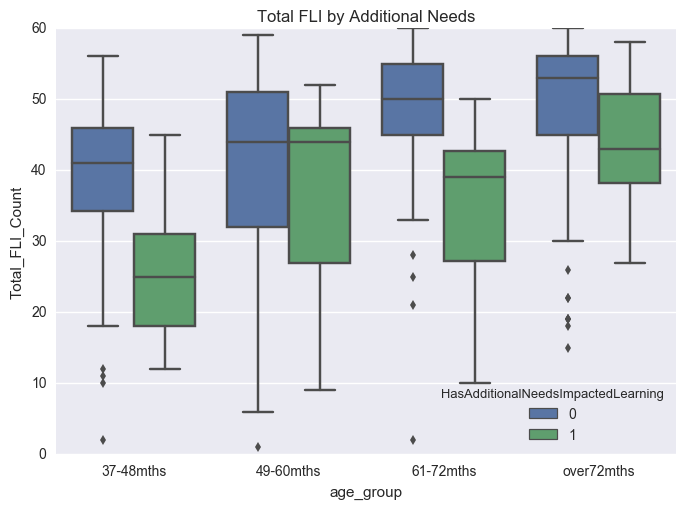

In [6]:
add_needs_df = df.loc[df['age_group'].isin(['37-48mths', '49-60mths', '61-72mths', 'over72mths']),:]

sns.boxplot(x='age_group', y='Total_FLI_Count', data=add_needs_df, 
            hue='HasAdditionalNeedsImpactedLearning',
           order=['37-48mths', '49-60mths', '61-72mths', 'over72mths'])

sns.plt.title('Total FLI by Additional Needs')

The plot above shows that this hypothesis appears true in the 37-48 month, 61-72 month and over 72 month age groups for TSC’s sample of clients. The distribution of FLI scores tend to be higher for children without additional needs across the age groups. Below we explore the descriptive statistics:

In [7]:
df_gpby_agegp_addneeds = df.groupby(['age_group','HasAdditionalNeedsImpactedLearning'])

df_gpby_agegp_addneeds['Total_FLI_Count'].describe().unstack()

count       mean        std  \
age_group  HasAdditionalNeedsImpactedLearning                                
0-12mths   0                                    22.0  11.090909   5.281676   
13-24mths  0                                    45.0  18.511111   7.674107   
           1                                     1.0  12.000000        NaN   
25-36mths  0                                    53.0  31.981132  10.357997   
           1                                     2.0  16.500000   3.535534   
37-48mths  0                                    50.0  38.300000  11.868755   
           1                                    13.0  25.307692   9.927946   
49-60mths  0                                    53.0  39.924528  14.133769   
           1                                    13.0  36.230769  15.390223   
61-72mths  0                                    65.0  47.892308  10.436000   
           1                                    10.0  34.600000  13.858010   
over72mths 0                                   109.0  48.706422  10.802351   
           1                                    14.0  42.642857  10.073630   

                                                min    25%   50%    75%   max  
age_group  HasAdditionalNeedsImpactedLearning                                  
0-12mths   0                                    2.0   8.00  10.5  15.75  20.0  
13-24mths  0                                    6.0  12.00  20.0  24.00  37.0  
           1                                   12.0  12.00  12.0  12.00  12.0  
25-36mths  0                                    1.0  28.00  35.0  39.00  46.0  
           1                                   14.0  15.25  16.5  17.75  19.0  
37-48mths  0                                    2.0  34.25  41.0  46.00  56.0  
           1                                   12.0  18.00  25.0  31.00  45.0  
49-60mths  0                                    1.0  32.00  44.0  51.00  59.0  
           1                                    9.0  27.00  44.0  46.00  52.0  
61-72mths  0                                    2.0  45.00  50.0  55.00  60.0  
           1                                   10.0  27.25  39.0  42.75  50.0  
over72mths 0                                   15.0  45.00  53.0  56.00  60.0  
           1                                   27.0  38.25  43.0  50.75  58.0

### Hypothesis Testing
To conduct the hypothesis test, we use non-parametric tests since we cannot conclude that the population distribution of FLI scores are normal. We use the non-parametric tests Mann-Whitney U and Mood’s Median test. Our situation meets the assumptions of both tests given that our observations are independent.
It should be noted that some sources state an additional assumption for Mood’s median test, requiring that the samples come from distributions of the same ‘shape’, whilst other sources omit this assumption. Mood’s median test also has low statistical power, hence conducting both tests allows us to draw more robust conclusions.


### Mann-Whitney U test of Mean Ranks

C:\Users\yeyau\Documents\WinPython-32bit-3.5.2.3Qt5\python-3.5.2\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


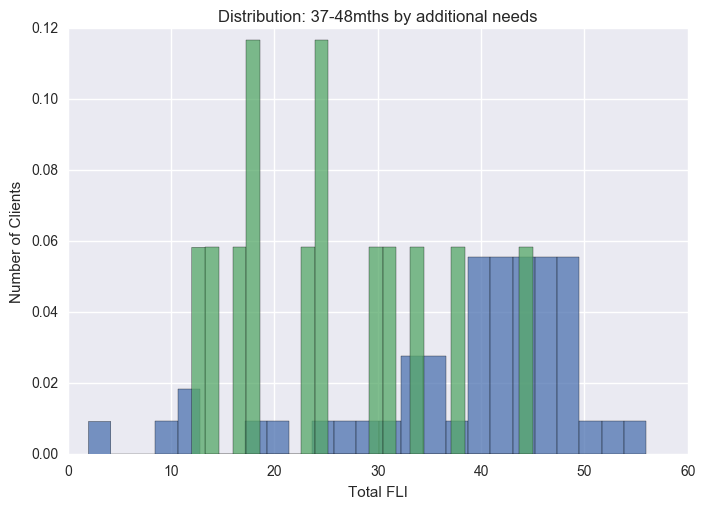

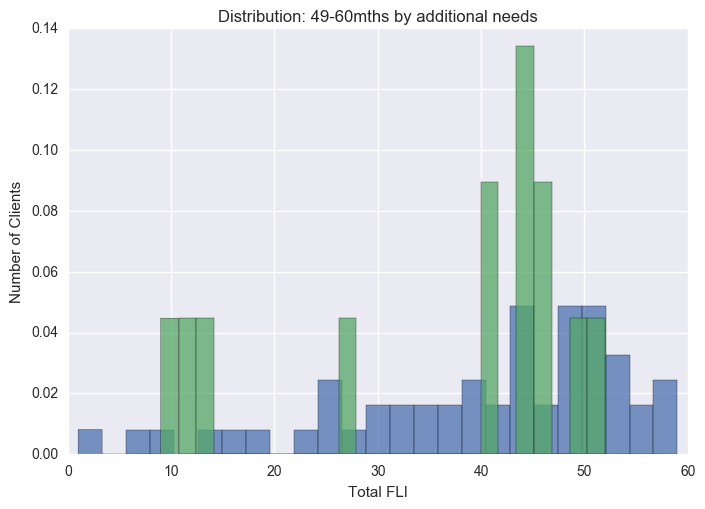

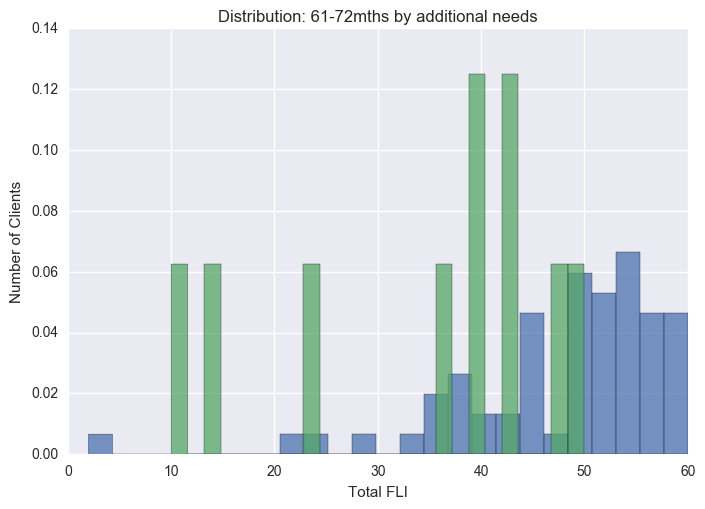

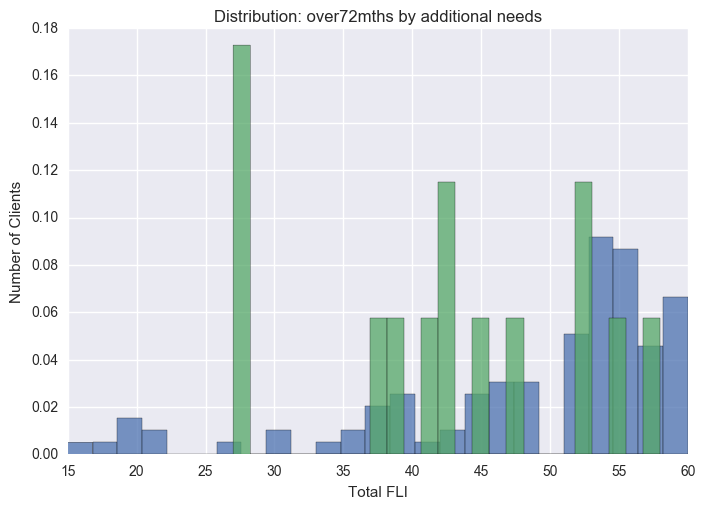

In [11]:
# Let's take a look at the distributions of Total FLI between the groups with additional needs and without:
add_needs = [0,1]

age_group_list = ['37-48mths', '49-60mths', '61-72mths', 'over72mths']

for age_group in age_group_list:
    for add_needs_group in add_needs:
        n, bins, patches = plt.hist(df.loc[((df.age_group == age_group) & (df.HasAdditionalNeedsImpactedLearning == add_needs_group)), 'Total_FLI_Count'],
                                      25, normed=1, alpha=0.75)
        plt.ylabel('Number of Clients')
        plt.xlabel('Total FLI')
        plt.title('Distribution: ' + age_group + ' by additional needs')
    plt.legend()
    plt.show()

Histogram plots show that the distributions are different shapes, so the Mann-Whitney U test should be interpreted as a comparison of mean ranks (https://statistics.laerd.com/premium-sample/mwut/mann-whitney-test-in-spss-2.php). We can observe the mean FLI counts above.

### Implementation of Mann-Whitney U test of mean ranks (or equal distributions)

We implement method 2 from: https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test with estimate of p value using a normal distribution.

### Null Hypothesis
$H_0$: The distribution of FLI scores between clients without additional needs vs. clients with additional needs are the same.

### Alternative Hypothesis
$H_1$: The distribution of FLI scores for the two groups are not equal.

or

$H_1$: The mean ranks of the two groups are not equal.

In [10]:
# Create Mann-Whitney U test

def mannwhitneyu_yau(the_dataset, independent_grouping_col, dependent_var_col):
    '''This implements Method 2 of Mann-Whitney U to compare central tendencies of two groups for a dependent variable.
        The independent grouping should be coded 0 and 1. The output is a z value, so uses a normal approximation to obtain a p-value.
        Users may use the z-value to look up a standard normal distribution table to obtain a p-value.
        This function coincides with mannwhitneyu from scipy'''
    
    # sorts the dataset by the dependent variable column
    the_dataset.sort([dependent_var_col], inplace=True, ascending = 1)
    
    # create new column for rank
    the_dataset['rank']=0

    # create initial ranking column
    for row, i in zip(the_dataset.index , range(len(the_dataset)) ):
        the_dataset.ix[row,['rank']] = i+1
    
    # make new index so we can use for ranking
    the_dataset.index = range(len(the_dataset))

    # create new column for final rank and initialise with 0
    the_dataset['final_rank'] = 0

    # create empty list to keep track of runs
    runs = []

    # do the final ranks
    for i in range(len(the_dataset)):
        
        if i==0:
            the_dataset.ix[i, 'final_rank'] = the_dataset.ix[i, 'rank'] 
    
        if ((i>=1) & (i<(len(the_dataset)-1))):
                
            if ( (the_dataset.ix[i, dependent_var_col] > the_dataset.ix[i-1, dependent_var_col]) & (the_dataset.ix[i, dependent_var_col] < the_dataset.ix[i+1, dependent_var_col])):
            
                del runs[:]
                the_dataset.ix[i, 'final_rank'] = the_dataset.ix[i, 'rank']
            
            if ( (the_dataset.ix[i, dependent_var_col] > the_dataset.ix[i-1, dependent_var_col]) 
                & (the_dataset.ix[i, dependent_var_col] == the_dataset.ix[i+1, dependent_var_col])):
            
                runs.append(the_dataset.ix[i, 'rank'])
        
            if ( (the_dataset.ix[i, dependent_var_col] == the_dataset.ix[i-1, dependent_var_col]) 
                & (the_dataset.ix[i, dependent_var_col] == the_dataset.ix[i+1, dependent_var_col])):
            
                runs.append(the_dataset.ix[i, 'rank'])
                    
            if ( (the_dataset.ix[i, dependent_var_col] == the_dataset.ix[i-1, dependent_var_col]) 
                & (the_dataset.ix[i, dependent_var_col] < the_dataset.ix[i+1, dependent_var_col])):
            
                runs.append(the_dataset.ix[i, 'rank'])
                the_dataset.ix[((i+1)-len(runs)):(i+1), 'final_rank'] = sum(runs)/len(runs) # average of ranks
                del runs[:]
        
        if i==(len(the_dataset)-1):
        
            if ( (the_dataset.ix[i, dependent_var_col] > the_dataset.ix[i-1, dependent_var_col]) ):
            
                the_dataset.ix[i, 'final_rank'] = the_dataset.ix[i, 'rank']
            else:
                runs.append(the_dataset.ix[i, 'rank'])
                the_dataset.ix[((i+1)-len(runs)):(i+1), 'final_rank'] = sum(runs)/len(runs) # average of ranks

    
    # add up final ranks by group:
    r1 = the_dataset.loc[the_dataset[independent_grouping_col]==0,'final_rank'].sum()
    r2 = the_dataset.loc[the_dataset[independent_grouping_col]==1,'final_rank'].sum()
    
    # get number of observations of each sample
    n1 = len(the_dataset.loc[the_dataset[independent_grouping_col]==0,:].index)
    n2 = len(the_dataset.loc[the_dataset[independent_grouping_col]==1,:].index)
    
    # Calculate the statistics
    U1 = r1-(n1*(n1+1)/2)
    U2 = r2-(n2*(n2+1)/2)
    
    import math

    # The smaller value of U1, U2 is used to consult significance tables
    U = min(U1, U2)

    # normalise the U, to use normal approximation
    mu = (n1*n2)/2
    sigma_u = math.sqrt((n1*n2*(n1+n2+1))/12)

    # z-value
    z = (U-mu)/sigma_u
    print('Z-Value for Normal Approximation: ' + str(z))

We run the Mann Whitney U test for each age group of interest below:

In [13]:

for age_group in age_group_list:
    print(age_group)
    mannwhitneyu_yau(df.loc[( (df['age_group']==age_group) & (df['Total_FLI_Count'].notnull() ) )
                          , ['Total_FLI_Count', 'HasAdditionalNeedsImpactedLearning', 'age_group']], 
                          'HasAdditionalNeedsImpactedLearning',
                          'Total_FLI_Count'
                    )

37-48mths
Z-Value for Normal Approximation: -3.464767724482463
49-60mths


C:\Users\yeyau\Documents\WinPython-32bit-3.5.2.3Qt5\python-3.5.2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Z-Value for Normal Approximation: -0.8625760445177413
61-72mths
Z-Value for Normal Approximation: -3.218453245822682
over72mths
Z-Value for Normal Approximation: -2.357188017231883


Using the standard normal distrobution tables, we find that the $p$-values are:

* 37-48 months: 0.00027
* 49-60 months: 0.1948
* 61-72 months: 0.0006
* Over 72 months: 0.0093

**Based on these p-values, we conclude that there is significant evidence to suggest that children without additional needs in the 37-48, 61-72 and Over 72 month age groups tend to have higher FLI scores.**

### Mood’s Median Test
We conducted the Non-parametric Mood’s median test as a second test of statistical significance of the difference of medians between children with additional needs and children without additional needs. 

In [30]:
add_needs_df.groupby(['age_group', 'HasAdditionalNeedsImpactedLearning'])['Total_FLI_Count'].median()

age_group   HasAdditionalNeedsImpactedLearning
37-48mths   0                                     41
            1                                     25
49-60mths   0                                     44
            1                                     44
61-72mths   0                                     50
            1                                     39
over72mths  0                                     53
            1                                     43
Name: Total_FLI_Count, dtype: int64

In [19]:
from scipy.stats import median_test

for g in age_group_list:
    stat, p, med, tbl = median_test(df.loc[((df['age_group']==g) & (df['HasAdditionalNeedsImpactedLearning']==0)),
                                       'Total_FLI_Count'],
                                  df.loc[((df['age_group']==g) & (df['HasAdditionalNeedsImpactedLearning']==1)),
                                      'Total_FLI_Count']
                                 )
    
    print('Median Test for ' + g)
    print(p, med, tbl)

Median Test for 37-48mths
0.00735888677408 40.0 [[27  1]
 [23 12]]
Median Test for 49-60mths
0.806999629739 44.0 [[25  6]
 [28  7]]
Median Test for 61-72mths
0.00968377541959 50.0 [[32  0]
 [33 10]]
Median Test for over72mths
0.0586291301243 52.0 [[57  3]
 [52 11]]


Based on the above p-values, we conclude that generally, **there is strong evidence to suggest that the median FLI score for children without additional needs tends to be higher compared to children with additional needs.** In the 49-60 month age group we were unable to determine a difference in medians.

We see that the Mann-Whitney U test and Mood’s median test draw the same conclusions.

### Access to services

In this section we consider children who accessed intervention services early upon diagnosis of hearing loss at birth (began intervention <= 3 months after diagnosis) versus those who accessed intervention services later (intervention > 3 months after diagnosis). We only consider children without additional needs. We hypothesize that children who access intervention services earlier should have higher FLI scores compared to those who access intervention later.

In [14]:
# Take only the clients who failed new born hearing screening to get a proper comparison
df_months = df.loc[df['newbornhearingresult']=='Refer',:]

In [15]:
# Create column indicating if client accessed services at 3 months or before or later
df_months['early_access'] = np.where(df_months['MonthsAtIntervention'] <= 3, 'early', 'later')

# Look at number of clients in each group
pd.crosstab(df_months['early_access'], df_months['age_group'])

C:\Users\yeyau\Documents\WinPython-32bit-3.5.2.3Qt5\python-3.5.2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


age_group,0-12mths,13-24mths,25-36mths,37-48mths,49-60mths,61-72mths,over72mths
early_access,,,,,,,
early,17,18,28,21,23,24,27
later,4,22,21,26,27,31,54


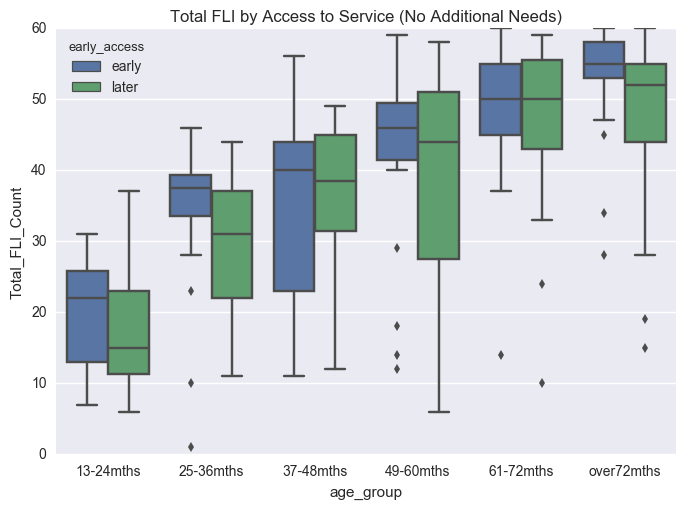

In [16]:
all_groups = ['13-24mths', '25-36mths', '37-48mths', '49-60mths', '61-72mths', 'over72mths']

# plot to see differences
sns.boxplot(x='age_group', y='Total_FLI_Count', data=df_months, hue='early_access', order=all_groups)
sns.plt.title('Total FLI by Access to Service (No Additional Needs)')

The plot above presents the distributions of FLI score for the various age groups. The plot suggests that the hypothesis holds for the age groups 13-24 months, 25-36 months, 49-60 months and over 72 months. 

### Mann-Whitney U Test

We similarly run the Mann-Whitney U test for each age group, with the following distinction of clients:

We let $g1$ = clients without additional needs impacted learning, who did not pass SWISH and accessed TSC services within 3 months of birth.

And $g2$ = clients without additional needs impacted learning, who did not pass SWISH and accessed TSC services after 3 months of birth.

In [17]:
# Just use scipy's implementation of mann whitney U since it coincides with our own
import scipy
from scipy.stats import mannwhitneyu

for g in all_groups:
    u_value, p_value = mannwhitneyu(df_months.loc[((df_months['age_group']==g) & (df_months['early_access']=='early')),
                                       'Total_FLI_Count'],
                                  df_months.loc[((df_months['age_group']==g) & (df_months['early_access']=='later')),
                                      'Total_FLI_Count']
                                   )
    
    print(g + ' U Value: ' + str(u_value), 'P-Value: ' + str(p_value))

13-24mths U Value: 148.5 P-Value: 0.0911208187456
25-36mths U Value: 182.0 P-Value: 0.0120015980426
37-48mths U Value: 264.0 P-Value: 0.427756590845
49-60mths U Value: 273.5 P-Value: 0.238549422625
61-72mths U Value: 361.5 P-Value: 0.432528224034
over72mths U Value: 492.0 P-Value: 0.00877706086534


We conclude from the $p$-values that **there is evidence to suggest that there is a greater probability for a random FLI score from $g1$ to be greater than that of $g2$ for the 25-36 and over 72 month age groups. There is mild evidence that the hypothesis holds for the 13-24 month age group.**

### Mood's Median Test

In [21]:
# re-run median test for all groups
for g in all_groups:
    stat, p, med, tbl = median_test(df_months.loc[((df_months['age_group']==g) & (df_months['early_access']=='early')),
                                       'Total_FLI_Count'],
                                  df_months.loc[((df_months['age_group']==g) & (df_months['early_access']=='later')),
                                      'Total_FLI_Count']
                                 )
    print('Median Test for ' + g)
    print('Median: ' + str(med))
    print('p-value: ' + str(p))
    print('Contingency Table:')
    print(tbl)

Median Test for 13-24mths
Median: 20.0
p-value: 0.214585928936
Contingency Table:
[[11  8]
 [ 7 14]]
Median Test for 25-36mths
Median: 35.0
p-value: 0.172739196655
Contingency Table:
[[16  7]
 [12 14]]
Median Test for 37-48mths
Median: 40.0
p-value: 0.737940989514
Contingency Table:
[[10 10]
 [11 16]]
Median Test for 49-60mths
Median: 45.0
p-value: 0.600429617233
Contingency Table:
[[12 11]
 [11 16]]
Median Test for 61-72mths
Median: 50.0
p-value: 0.823238777363
Contingency Table:
[[11 14]
 [13 17]]
Median Test for over72mths
Median: 53.0
p-value: 0.134032803505
Contingency Table:
[[16 21]
 [11 33]]


We conclude from the $p$-values that there is very mild evidence to suggest that children who are able to access services immediately after birth have higher FLI scores in the 13-24, 25-36 and over 72 month age groups. We do not have appropriate $p$-values in other age groups to draw further conclusions regarding access to services.

The Mann-Whitney U and Mood’s median test for FLI score considering the variables of Additional Needs and Early Access to intervention services demonstrates that the FLI is indeed able to distinguish between certain groups for which differences can be expected.

## Convergent Validity

In this section, we determine whether the FLI is consistent with established frameworks which also assess listening skills in early childhood. We compare the correlation of FLI with other pediatric measures of listening: LittlEars and PEACH. We first prepare the data and observe the summary statistics:

In [22]:
# read in little ears and peach data
little_ears = pd.read_excel('S:/Clinical/Information & Analysis/Reports and Analysis/Research/FLI-P Validation Project/TSC Final Datasets/14-10-2016 PEACH and Little Ears Results.xlsx',
                  'Sheet 1')

In [23]:
# take only observations with little ears scores
le_df = little_ears.loc[little_ears['LE_TotalScore'].notnull(),:]

In [24]:
# Explore the columns in the dataset
le_df.columns

Index(['PersonGUID', 'Peach_Quiet_Raw', 'Peach_Quiet_Percentage',
       'Peach_Ease_Quiet_Raw', 'Peach_Ease_Quiet_Percentage',
       'Peach_Noise_Raw', 'Peach_Noise_Percentage', 'Peach_Ease_Noise_Raw',
       'Peach_Ease_Noise_Percentage', 'Peach_Overall_Raw',
       'Peach_Overall_Percentage', 'Peach_Ease_Overall_Raw',
       'Peach_Ease_Overall_Percentage', 'LE_TotalScore'],
      dtype='object')

In [25]:
# join with fli dataset
le_fli_df = pd.merge(df, le_df, how='inner', left_on='PersonGUID', right_on='PersonGUID')
le_fli_df.head(3)

,PersonGUID,newbornhearingresult,BirthDateTime,Child_Age_In_Months,age_group,age_in_months_at_last_update,FLI_items_0_mths,FLI_items_3_mths,FLI_items_6_mths,FLI_items_9_mths,...,Peach_Ease_Quiet_Percentage,Peach_Noise_Raw,Peach_Noise_Percentage,Peach_Ease_Noise_Raw,Peach_Ease_Noise_Percentage,Peach_Overall_Raw,Peach_Overall_Percentage,Peach_Ease_Overall_Raw,Peach_Ease_Overall_Percentage,LE_TotalScore
0,A6EA86FA-340D-4D4A-AD9B-846F0ACAED88,Refer,2010-12-10,70,61-72mths,67,4,4,4.0,4.0,...,0.916667,16.0,0.8,11.0,0.55,39.0,0.886364,33.0,0.750000,31.0
1,57A365AE-8F0D-4E20-97F5-87E9D886EBA7,Refer,2010-11-06,71,61-72mths,61,0,0,0.0,0.0,...,0.000000,14.0,0.7,0.0,0.00,32.0,0.727273,0.0,0.000000,34.0
2,CB6B78D3-14B8-4BA8-9957-468BE829C9FF,Refer,2014-02-26,32,25-36mths,29,31,31,31.0,31.0,...,0.750000,14.0,0.7,13.0,0.65,32.0,0.727273,31.0,0.704545,34.0


In [26]:
# Let's view some summary statistics by age group
le_fli_df_by_age_group = le_fli_df.groupby('age_group')

le_fli_df_by_age_group['LE_TotalScore'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
0-12mths,9.0,15.777778,6.379220,9.0,11.00,15.0,18.00,29.0
13-24mths,14.0,25.357143,8.661206,6.0,22.25,26.0,32.75,35.0
25-36mths,2.0,34.500000,0.707107,34.0,34.25,34.5,34.75,35.0
37-48mths,1.0,31.000000,NaN,31.0,31.00,31.0,31.00,31.0
61-72mths,2.0,32.500000,2.121320,31.0,31.75,32.5,33.25,34.0


### Linear Model for LittlEars vs. FLI

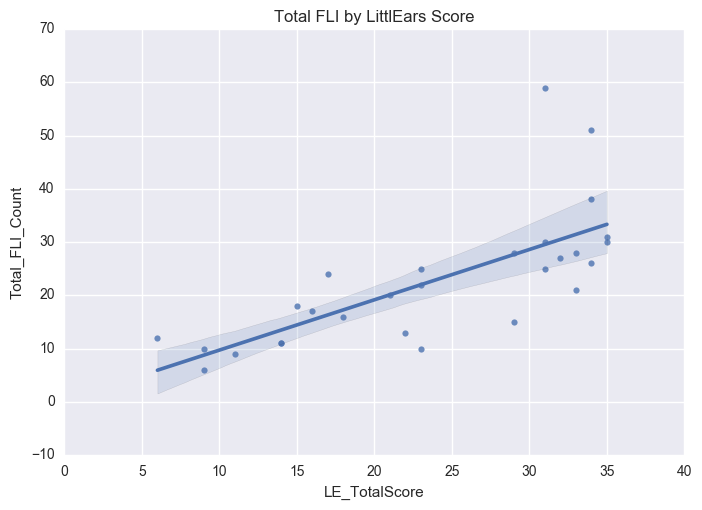

In [27]:
# seaborn regplot
sns.regplot(x='LE_TotalScore', y='Total_FLI_Count', data=le_fli_df, truncate=True, fit_reg=True)
sns.plt.title('Total FLI by LittlEars Score')

We use stats models so that we can get $p$ values and hypothesis test the model coefficients

In [28]:
import statsmodels.api as sm

model2 = sm.OLS(pd.DataFrame(le_fli_df['LE_TotalScore']), pd.DataFrame(le_fli_df['Total_FLI_Count']))
result = model2.fit()
print('statsmodels results:')
print(result.summary()) 

statsmodels results:
                            OLS Regression Results                            
Dep. Variable:          LE_TotalScore   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     224.6
Date:                Wed, 22 Mar 2017   Prob (F-statistic):           1.31e-14
Time:                        11:01:22   Log-Likelihood:                -99.005
No. Observations:                  28   AIC:                             200.0
Df Residuals:                      27   BIC:                             201.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Total_FLI_Count     0

We also run linear model from sklearn:

In [34]:
from sklearn import linear_model

# Create linear regression object
ols = linear_model.LinearRegression(fit_intercept=True)

# fit model (sklearn requires you to surround columns with pd.DataFrame)
model = ols.fit(pd.DataFrame(le_fli_df['LE_TotalScore']), pd.DataFrame(le_fli_df['Total_FLI_Count']))

#View intercept
print('Model Intercept: \n', model.intercept_)

# View model coefficient
print('Coefficient: \n', model.coef_)

# View R^2, explained variance on the same set of data
print('Variance score: %.2f' % model.score(pd.DataFrame(le_fli_df['LE_TotalScore']), pd.DataFrame(le_fli_df['Total_FLI_Count'])))

Model Intercept: 
 [ 0.28560141]
Coefficient: 
 [[ 0.94411354]]
Variance score: 0.52


The coefficient of LittlEars score is approximately 0.94, so **a 1 unit increase in LittlEars score corresponds to a 0.94 unit increase in Total FLI items achieved. The linear model using least squares regression method yields a coefficient of determination of 0.52 and hence the correlation coefficient of LittlEars and FLI score of 0.72 is quite strong.** The $p$ value of the coefficient gives strong evidence of a linear relationship between the two tests.

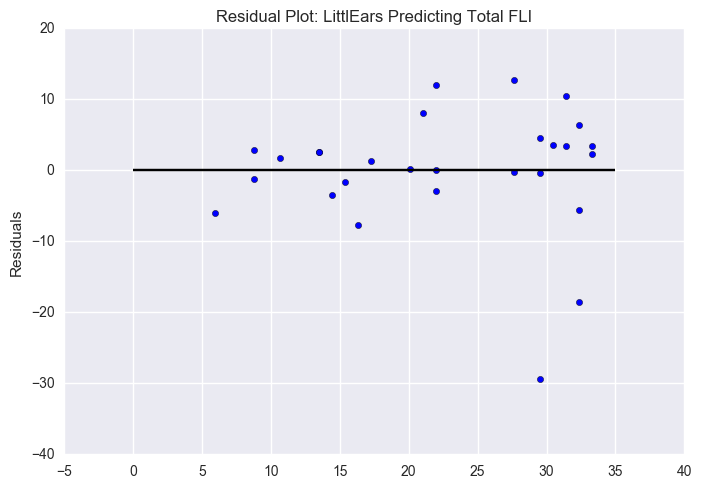

In [35]:
# Plot residuals
plt.scatter(ols.predict(pd.DataFrame(le_fli_df['LE_TotalScore'])), 
            ols.predict(pd.DataFrame(le_fli_df['LE_TotalScore']))-pd.DataFrame(le_fli_df['Total_FLI_Count']))
# plot horizontal line at 0
plt.hlines(y=0, xmin=0, xmax=35)
plt.title('Residual Plot: LittlEars Predicting Total FLI')
plt.ylabel('Residuals')


The plot of residuals shows that the errors are generally random and somewhat symmetrically distributed, hence, the linear model is appropriate and we conclude that FLI is consistent with LittlEars. **We further conclude that there is strong evidence of convergent validity for the FLI.**

#### PEACH

We now investigate whether FLI correlates with PEACH.

In [36]:
# take only those that have Peach scores
peach_df = little_ears.loc[little_ears['Peach_Overall_Raw'].notnull(),:]
peach_df.shape

(41, 14)

In [37]:
# join with fli dataset
peach_fli_df = pd.merge(df, peach_df, how='inner', left_on='PersonGUID', right_on='PersonGUID')
peach_fli_df.shape

(40, 113)

In [38]:
# Some descriptive statistics
peach_fli_df_gp = peach_fli_df.groupby('age_group')

peach_fli_df_gp['Peach_Overall_Raw'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
13-24mths,1.0,12.000000,NaN,12.0,12.00,12.0,12.00,12.0
25-36mths,9.0,37.666667,4.873397,30.0,32.00,40.0,41.00,42.0
37-48mths,8.0,36.375000,7.069805,23.0,33.25,37.5,41.00,44.0
49-60mths,10.0,37.200000,5.513620,25.0,35.50,37.0,40.75,44.0
61-72mths,8.0,36.625000,4.867898,28.0,34.25,37.5,39.50,43.0
over72mths,4.0,36.000000,3.265986,32.0,35.00,36.0,37.00,40.0


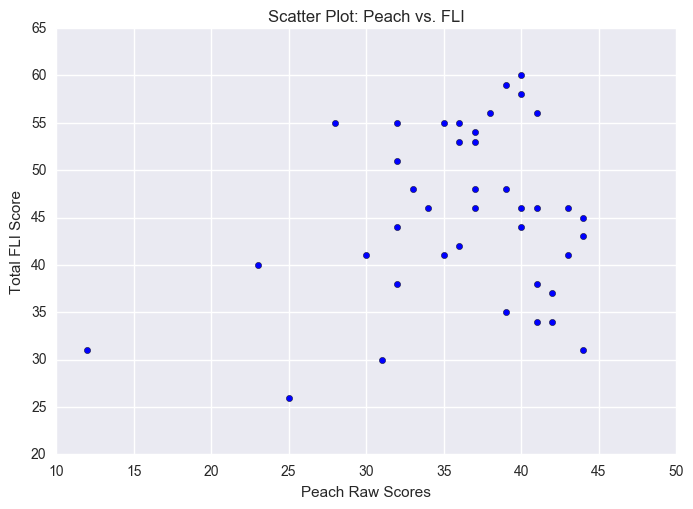

In [39]:
# Scatterplot Peach and FLI
plt.scatter(x='Peach_Overall_Raw', y='Total_FLI_Count', data=peach_fli_df)
plt.title('Scatter Plot: Peach vs. FLI')
plt.ylabel('Total FLI Score')
plt.xlabel('Peach Raw Scores')

There is no evidence of a linear relationship between PEACH and FLI scores. However this is somewhat expected since PEACH measures detection and FLI measures functional listening. This in fact demonstrates divergent validity.

# Predictive Validity


In this section we evaluate whether the FLI is predictive of language scores at 4 and 5 years of age. To do this, we build simple linear regression models for children with a language assessment at 4 and 5 years of age, using their accumulated FLI items at 3 month intervals.

### Data Prep

In [40]:
# get the columns for regression, originally 16:26
fli_months = list(df.columns[14:26])

In [41]:
len(fli_months)

12

In [42]:
# Read in all valid data files into a list
valid_list = []
for i in range(3,78,3):
    filestring = 'S:/Clinical/Information & Analysis/Reports and Analysis/Research/FLI-P Validation Project/date filtered data/Valid_data_at_' + str(i) + 'months.csv'
    valid_list.append( pd.read_csv(filestring))

In [43]:
# For each dataset create new column for time btw diagnosis and intervention
for dataset in valid_list:
    dataset['months_btw_diag_intervention'] = dataset['MonthsAtIntervention'] - dataset['MonthsAtDiagnosis']
    dataset['months_btw_diag_fit'] = dataset['MonthsAtFitting'] - dataset['MonthsAtDiagnosis']
    

In [44]:
valid_list[1].columns

Index(['Unnamed: 0', 'PersonGUID', 'BirthDateTime', 'Child_Age_In_Months',
       'age_group', 'age_in_months_at_last_update', 'FLI_items_0_mths',
       'FLI_items_3_mths', 'FLI_items_6_mths', 'FLI_items_9_mths',
       ...
       'RightDegreeChanged', 'RightDevice', 'RightDiagnosisAetiology',
       'RightStability', 'RightTypeChanged', 'month_for_first_appointment',
       'fli_before_3', 'fli_before_6', 'months_btw_diag_intervention',
       'months_btw_diag_fit'],
      dtype='object', length=105)

In [45]:
valid_list[1].loc[:, ['months_btw_diag_intervention', 'months_btw_diag_fit']].head()

,months_btw_diag_intervention,months_btw_diag_fit
0,0.0,5.0
1,0.0,1.0
2,2.0,2.0
3,2.0,15.0
4,3.0,0.0


In [46]:
# valid_list_to_plot - originally from 30 - 57 months, 9:19
valid_list_to_plot = valid_list[7:19]
len(valid_list_to_plot)

12

In [47]:
valid_list_to_plot[0].loc[:, ['FLI_items_24_mths', 'FLI_items_27_mths', 'Total_FLI_Count'] ].head()

,FLI_items_24_mths,FLI_items_27_mths,Total_FLI_Count
0,18.0,18.0,18
1,7.0,NaN,10
2,22.0,33.0,56
3,15.0,15.0,15
4,29.0,37.0,41


In [72]:
# Fix individual client's language score at 5
for dataset in valid_list_to_plot:
    dataset['best.tot.lang.at.5'][dataset['PersonGUID'] == '01D7444A-A03A-4EAF-80E0-DF4251D02687'] = 109


C:\Users\yeyau\Documents\WinPython-32bit-3.5.2.3Qt5\python-3.5.2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [74]:
# Look at some of the strange values: i.e. high FLI low Language
df.loc[((df['Total_FLI_Count'] > 40) & (df['best.tot.lang.at.5'] < 10)), ['PersonGUID', 'FLI_items_0_mths', 'FLI_items_3_mths', 'FLI_items_6_mths',
       'FLI_items_9_mths', 'FLI_items_12_mths', 'FLI_items_15_mths',
       'FLI_items_18_mths', 'FLI_items_21_mths', 'FLI_items_24_mths',
       'FLI_items_27_mths', 'FLI_items_30_mths', 'FLI_items_33_mths',
       'FLI_items_36_mths', 'FLI_items_39_mths', 'FLI_items_42_mths',
       'FLI_items_45_mths', 'FLI_items_48_mths', 'FLI_items_51_mths',
       'FLI_items_54_mths', 'FLI_items_57_mths', 'FLI_items_60_mths',
       'FLI_items_63_mths', 'FLI_items_66_mths', 'FLI_items_69_mths',
       'FLI_items_72_mths', 'FLI_items_75_mths', 'Total_FLI_Count', 'best.tot.lang.at.5' ]]

# Update the data entry error
df['best.tot.lang.at.5'][((df['Total_FLI_Count'] > 40) & (df['best.tot.lang.at.5'] < 10))] = 109

C:\Users\yeyau\Documents\WinPython-32bit-3.5.2.3Qt5\python-3.5.2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Fit linear models and plot regression lines

We first build some helper functions to run our models for the different datasets:

#### Create a function to plot scatters for each month

In [82]:
def plot_scatters_together(month_list, list_of_data, dependent_var):
    
    # get evenly spaced colour rainbow
    colours = cm.rainbow( np.linspace(0, 1, len(fli_months) ) )

    # scatter plot for each fli_item_count
    for f, colour, valid_set in zip(month_list, colours, list_of_data):
    
        # don't take the over 100 Total FLI and null values or no language score
        data_to_plot = valid_set.loc[((valid_set['Total_FLI_Count'] < 100)  # take out that error score
                                      & (valid_set[f].notnull())
                                      & (valid_set[f] > 2) # this is a reasonable assumption to make sure score at that pt is properly updated
                                      & (valid_set[dependent_var].notnull() ))  , :] 
    
        x = pd.DataFrame.as_matrix(data_to_plot[f])
        y = pd.DataFrame.as_matrix(data_to_plot[dependent_var])
    
        # plt.figure() -- Putting plt.figure() plots the scatters on individual graphs - it calls a new figure
    
        plt.scatter(x, y, c=colour)
        # place legend at specified location on plot
    
        print(f)
        fit = np.polyfit(x, y, deg=1 )
        plt.plot(x, fit[0] * x + fit[1], color=colour, label=f)
    
        plt.legend(bbox_to_anchor=(1.4, 1.0)) # calling legend without putting arguments in plots lines for each polyfit line
        plt.ylabel(dependent_var)
        plt.xlabel('FLI')
        plt.title('Predictive Power of FLI')

### Functions to construct regression models and plot data

In [75]:
# Use statsmodels to get more details on linear models
import statsmodels.api as sm


# function to construct linear regressions, putting in columns, colours and a list of the datasets
def construct_regressions(fli_months, colours, valid_list_to_plot, language_score):
    
    score_to_predict = language_score
    
    # scatter plot for each fli_item_count
    for f, colour, valid_set in zip(fli_months, colours, valid_list_to_plot):
    
        # don't take the over 100 Total FLI and null values or no language score
        data_to_plot = valid_set.loc[((valid_set['Total_FLI_Count'] < 100)  # take out that error score
                                      & (valid_set[f].notnull())
                                      & (valid_set[f] > 2) # this is a reasonable assumption to make sure score at that pt is properly updated
                                      & (valid_set[score_to_predict].notnull() ))  , :] 
    
    
        # add constant fits the model with an intercept - this is the standard regression model
        x = sm.add_constant(pd.DataFrame.as_matrix(data_to_plot[f]))
        y = pd.DataFrame.as_matrix(data_to_plot[score_to_predict])
        
        # for plotting
        x1 = pd.DataFrame.as_matrix(data_to_plot[f])
        
        # Fit and summarize OLS model
        model = sm.OLS(y, x)
        result = model.fit()
        print('***********************************************************************************')
        print(f)
        print(result.summary())
        
        print('Correlation: ' + str(np.corrcoef(x1,y)))
        
        # visualise data
        plt.scatter(x1, y, c=colour)
        plt.title('Linear Model: ' + 'FLI and ' + score_to_predict)
    
        # plot fit line
        fit = np.polyfit(x1, y, deg=1 )
        plt.plot(x1, fit[0] * x1 + fit[1], color=colour, label=f)
        
    # place legend at specified location on plot
    plt.legend(bbox_to_anchor=(1.4, 1.0))    
    plt.ylabel(str(score_to_predict))
    plt.xlabel('FLI') 


def plot_regressions(fli_months, colours, valid_list_to_plot, language_score):
    
    score_to_predict = language_score
    
    #Start multi-page PDF
    pp = PdfPages('S:/Clinical/Information & Analysis/Reports and Analysis/Research/FLI-P Validation Project/Plot Images/RegressionPlots' + language_score + '.pdf')

    for f, colour, valid_set in zip(fli_months, colours, valid_list_to_plot):
        
        # don't take the over 100 Total FLI and null values or no language score
        data_to_plot = valid_set.loc[((valid_set['Total_FLI_Count'] < 100)  # take out that error score
                                      & (valid_set[f].notnull())
                                      & (valid_set[f] > 2) # this is a reasonable assumption to make sure score at that pt is properly updated
                                      & (valid_set[score_to_predict].notnull() ))  , :] 
    
    
        # Create linear regression object
        ols = linear_model.LinearRegression(fit_intercept=True)

        # fit model (sklearn requires you to surround columns with pd.DataFrame)
        model = ols.fit(pd.DataFrame(data_to_plot[f]), pd.DataFrame(data_to_plot[score_to_predict]))
        
        # Plot residuals
        plt.figure('Residual ' + f)
        plt.scatter(ols.predict(pd.DataFrame(data_to_plot[f])), 
                    ols.predict(pd.DataFrame(data_to_plot[f]))-pd.DataFrame(data_to_plot[score_to_predict]))
        
        # plot horizontal line at 0
        plt.hlines(y=0, xmin=40, xmax=120)
        plt.title('Residual Plot: ' + f + ' ~ ' + score_to_predict)
        plt.xlabel(f)
        plt.ylabel('Residuals')
        plt.savefig(pp, format='pdf')
        
        # plot scatter
        plt.figure(f)
        plt.scatter(x, y, c=colour)
        
        # plot fit line
        plt.plot(x, fit[0] * x + fit[1], color=colour, label=f)
        plt.xlabel(f)
        plt.ylabel(score_to_predict)
        plt.title('Linear Model: ' + f + ' ~ ' + score_to_predict)
        plt.savefig(pp, format='pdf')
    
    pp.close()
    

## Predicting Language at 5 years of age

To predict Language scores at 5 years of age, we used client’s FLI cumulative counts from 30 months of age up to 57 months of age (essentially no clients ever regressed in FLI). We see that the general pattern is that FLI is increasingly predictive of language score, as the child’s age is closer to 5. 

***********************************************************************************
FLI_items_24_mths
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     4.155
Date:                Wed, 22 Mar 2017   Prob (F-statistic):             0.0550
Time:                        16:32:22   Log-Likelihood:                -94.770
No. Observations:                  22   AIC:                             193.5
Df Residuals:                      20   BIC:                             195.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

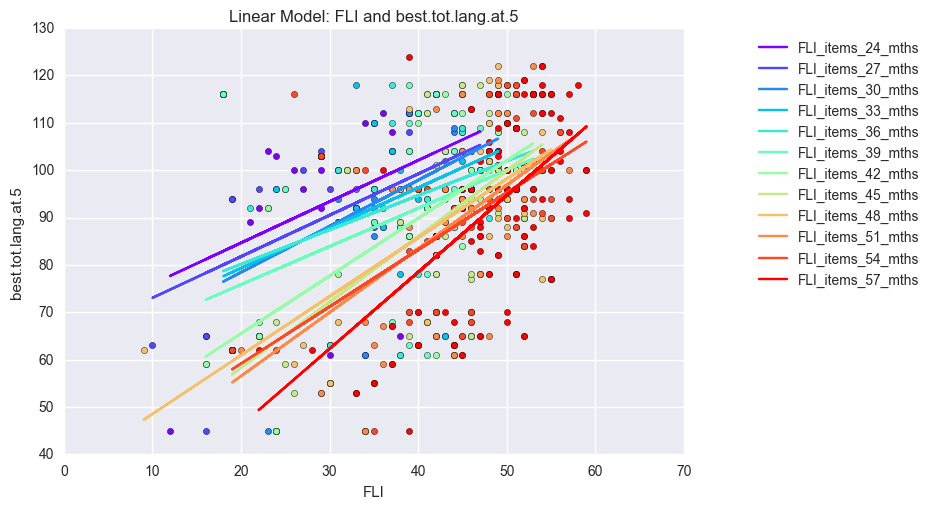

In [85]:
construct_regressions(fli_months, colours, valid_list_to_plot, 'best.tot.lang.at.5')

C:\Users\yeyau\Documents\WinPython-32bit-3.5.2.3Qt5\python-3.5.2\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


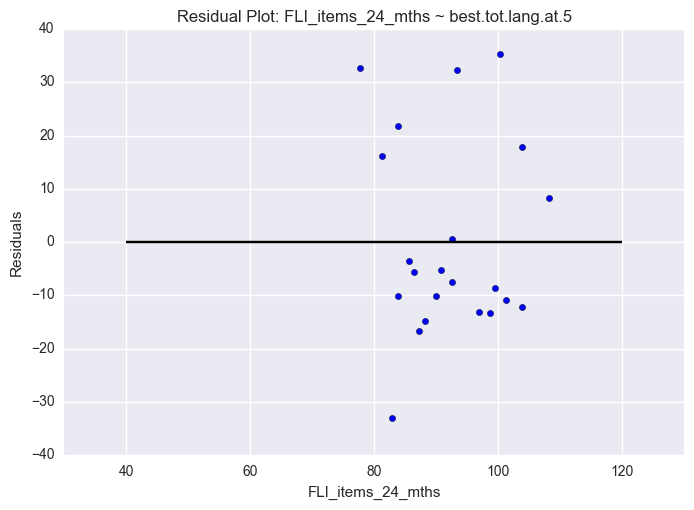

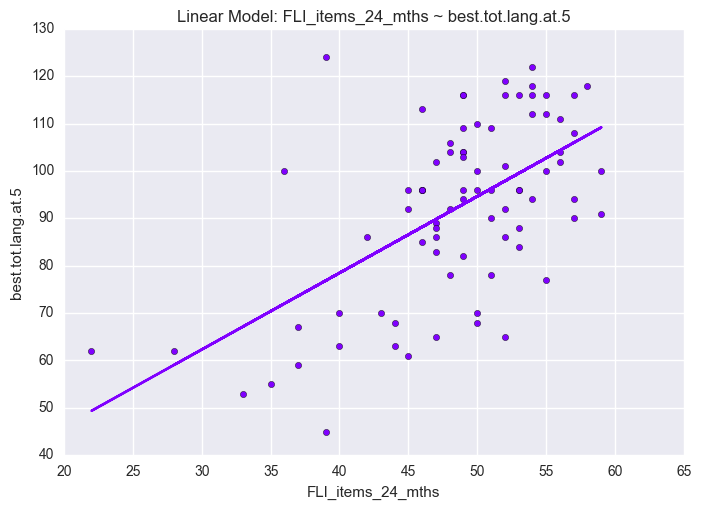

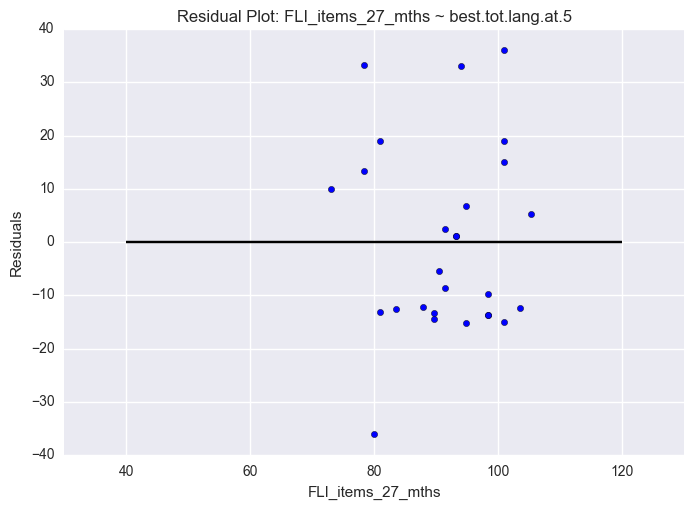

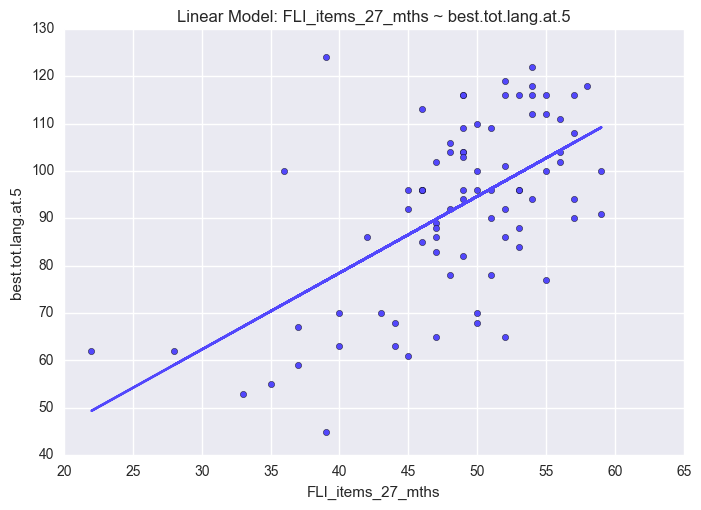

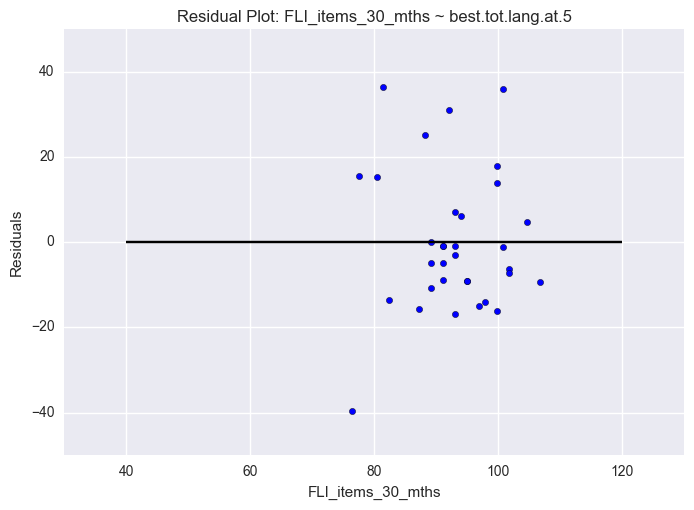

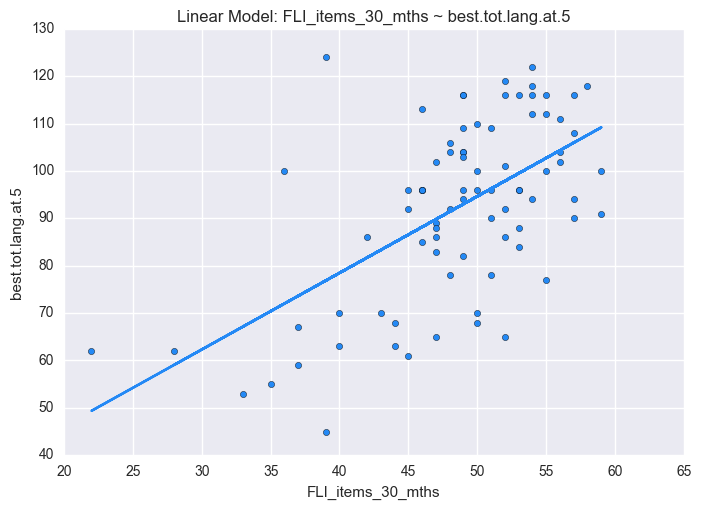

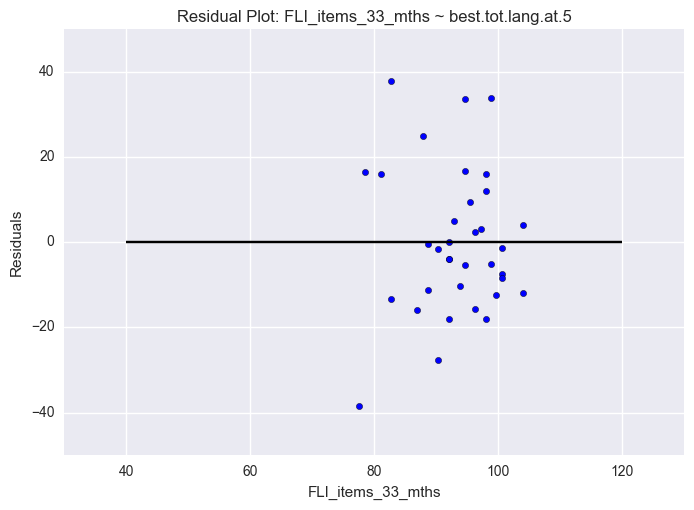

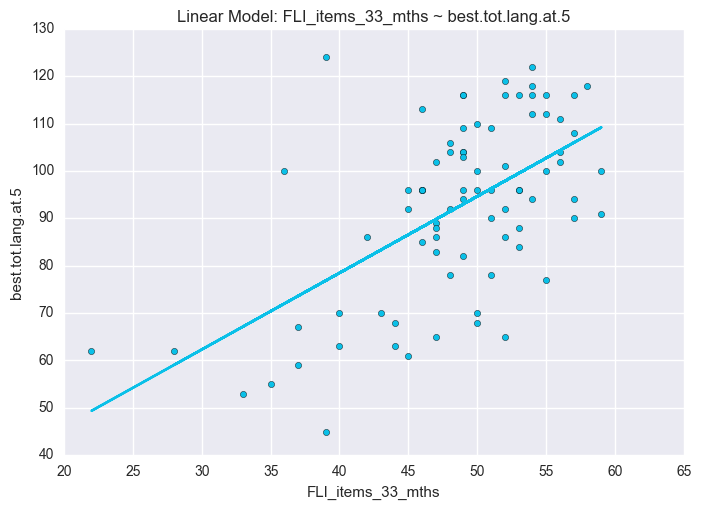

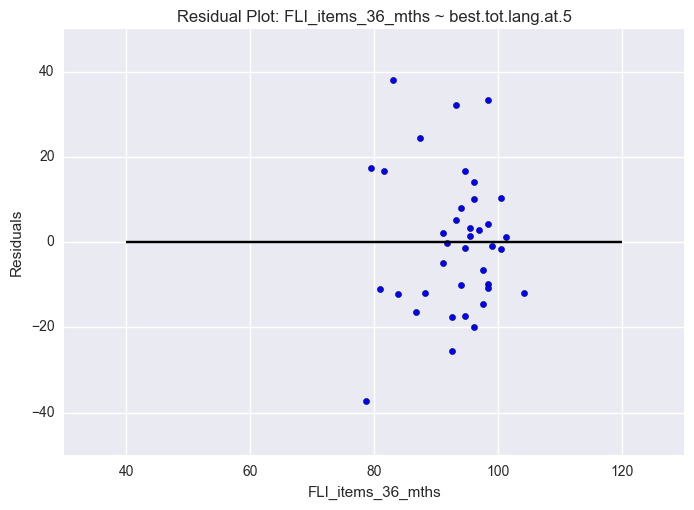

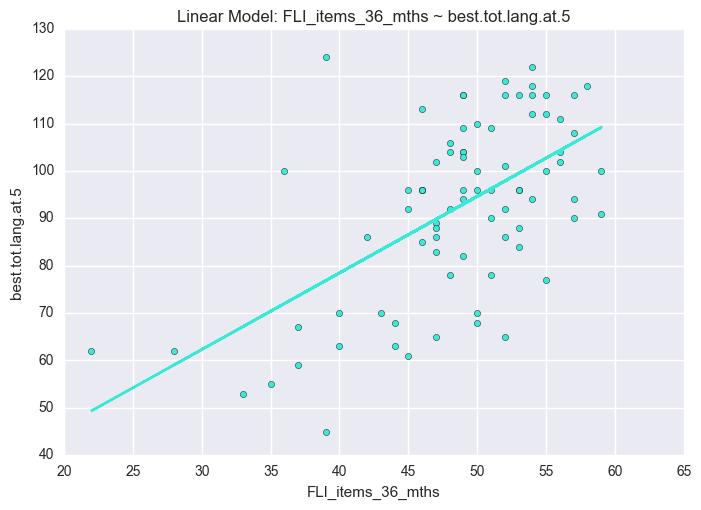

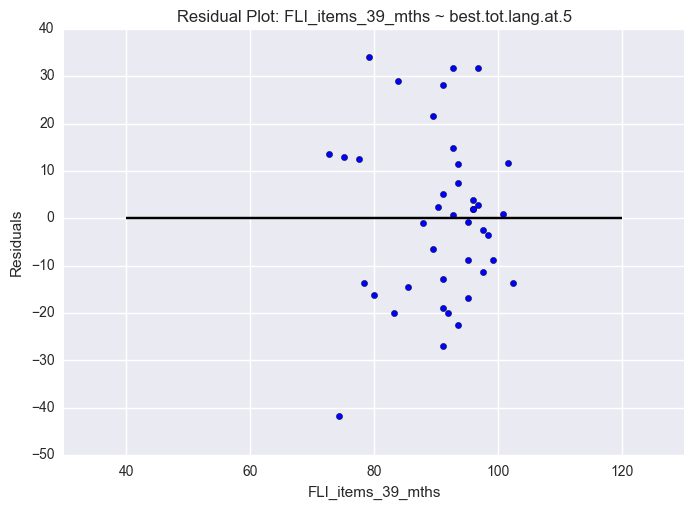

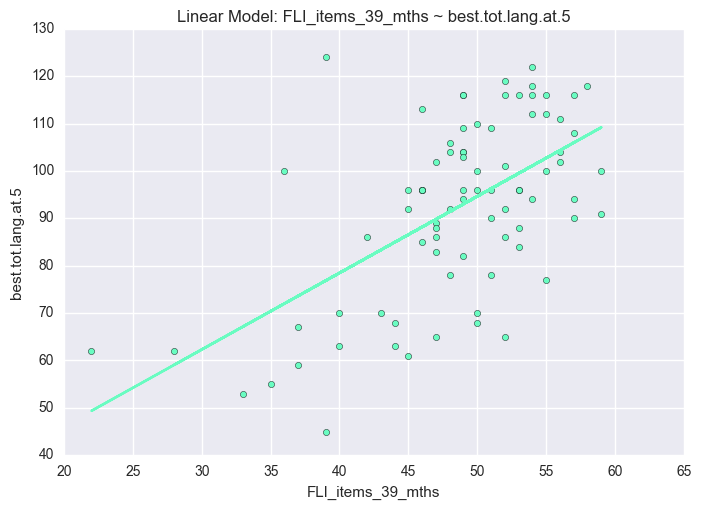

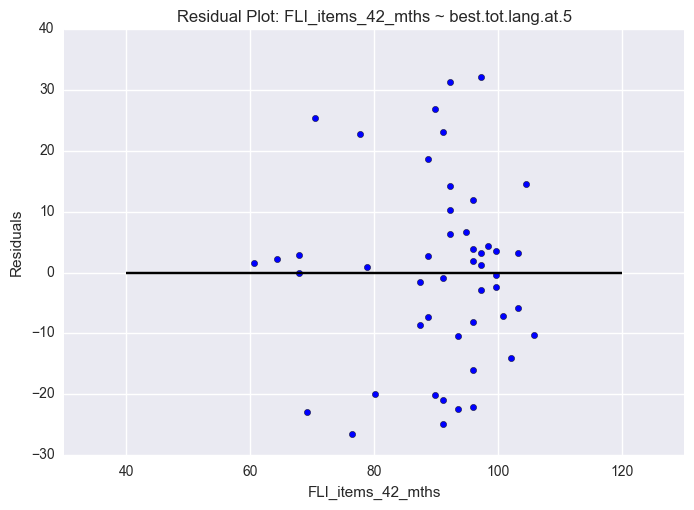

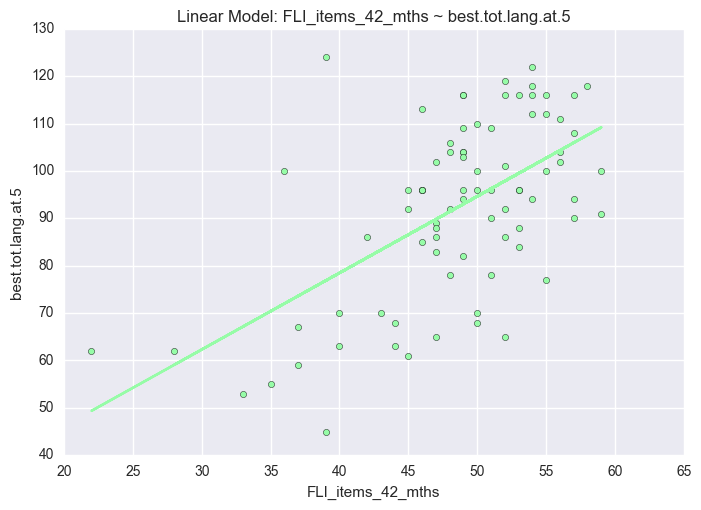

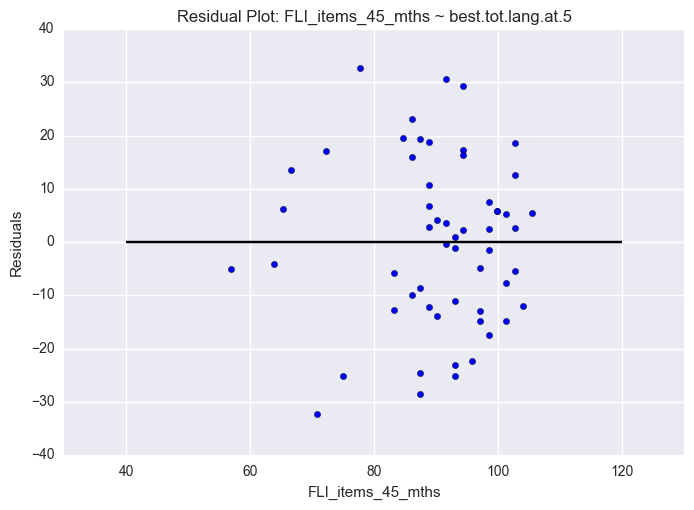

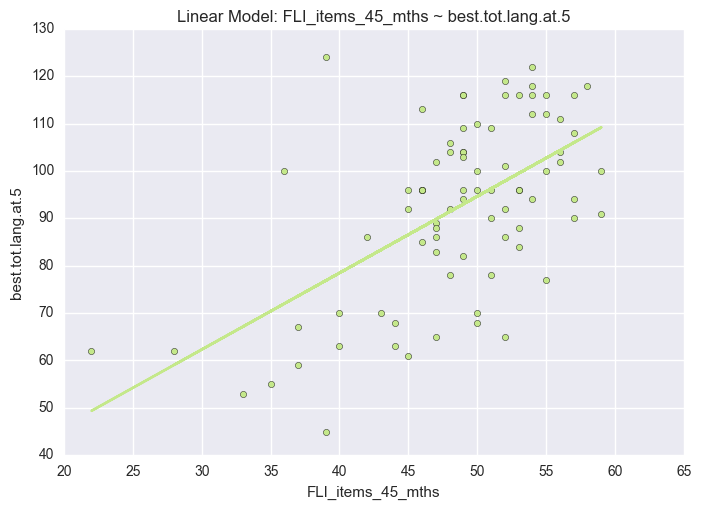

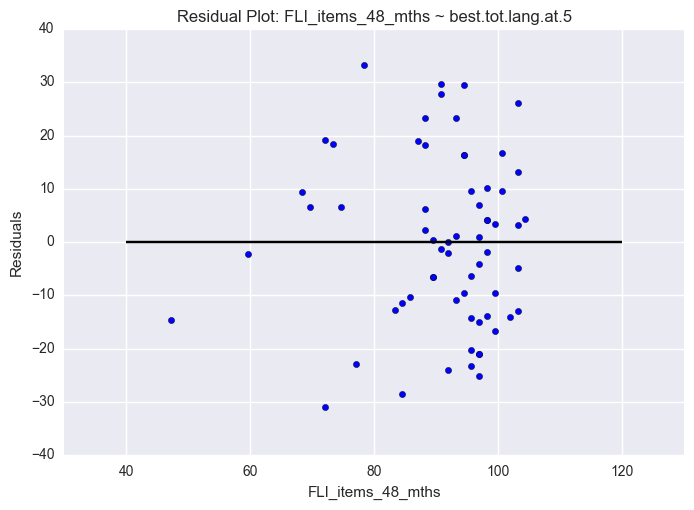

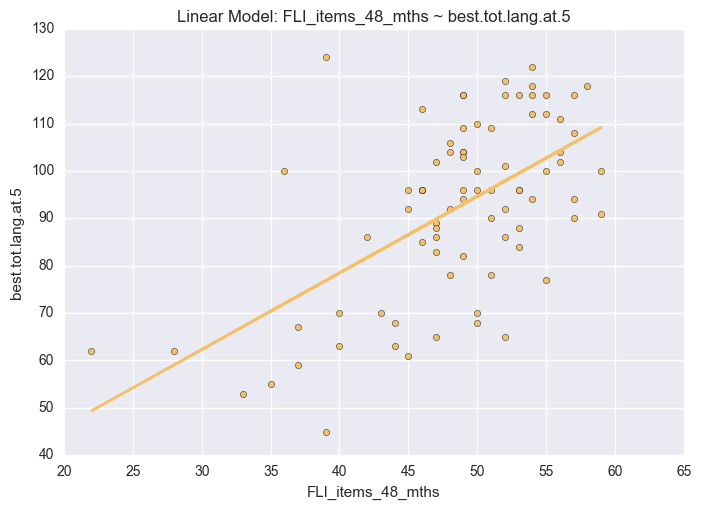

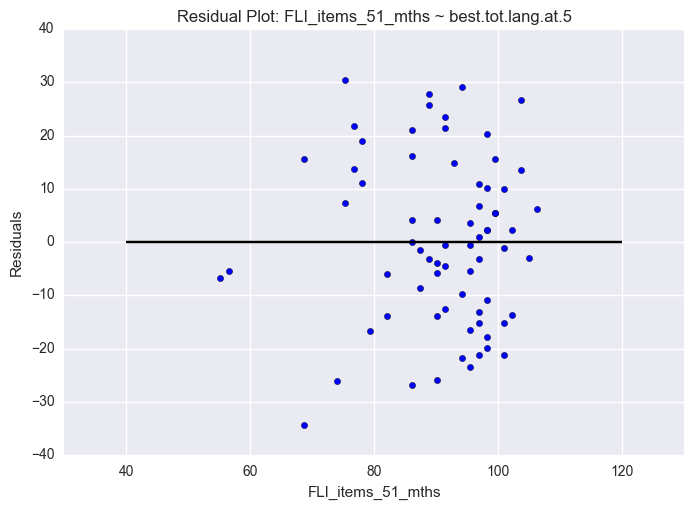

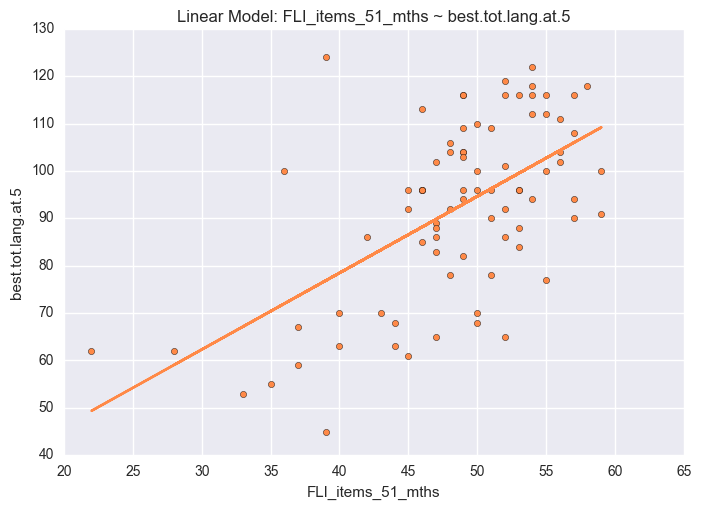

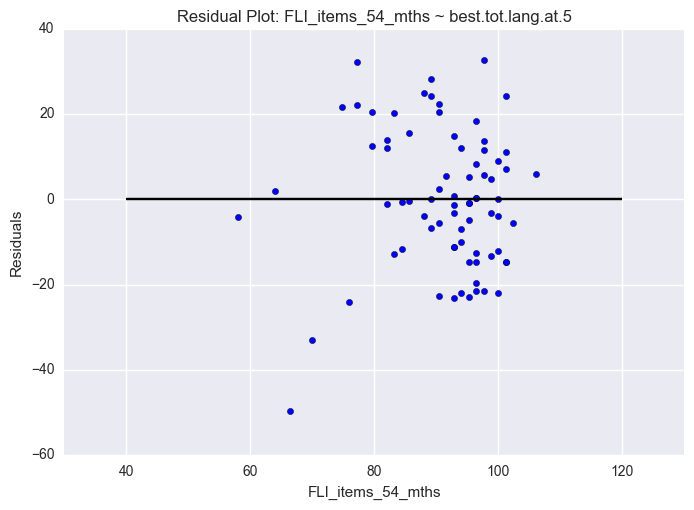

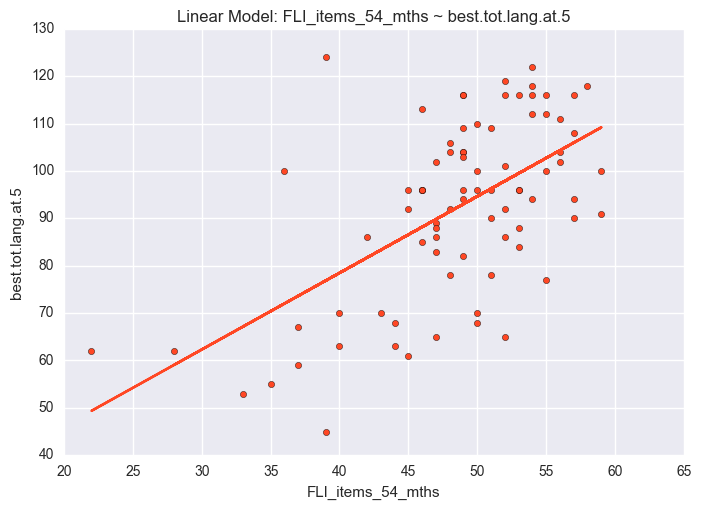

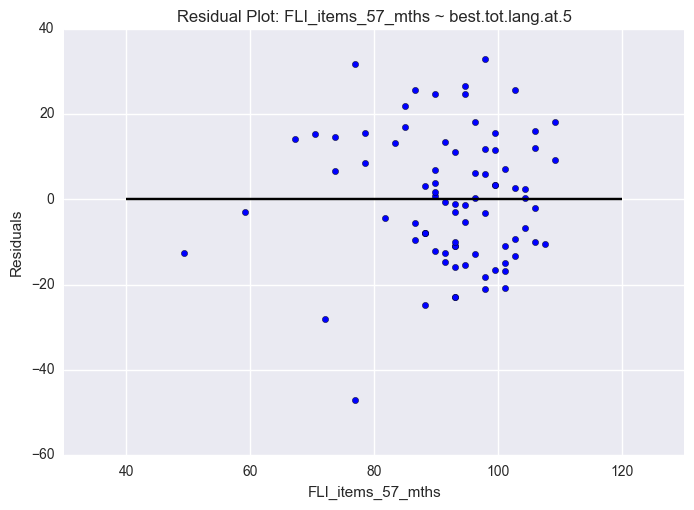

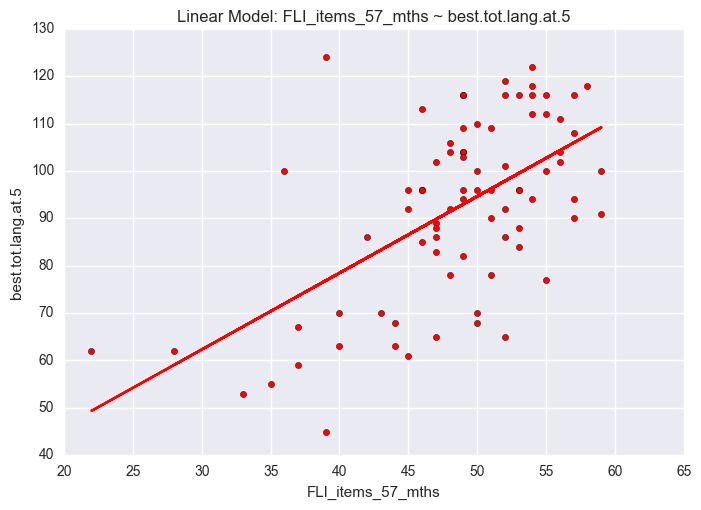

In [86]:
plot_regressions(fli_months, colours, valid_list_to_plot, 'best.tot.lang.at.5')

FLI_items_24_mths
FLI_items_27_mths
FLI_items_30_mths
FLI_items_33_mths
FLI_items_36_mths
FLI_items_39_mths
FLI_items_42_mths
FLI_items_45_mths
FLI_items_48_mths
FLI_items_51_mths
FLI_items_54_mths
FLI_items_57_mths


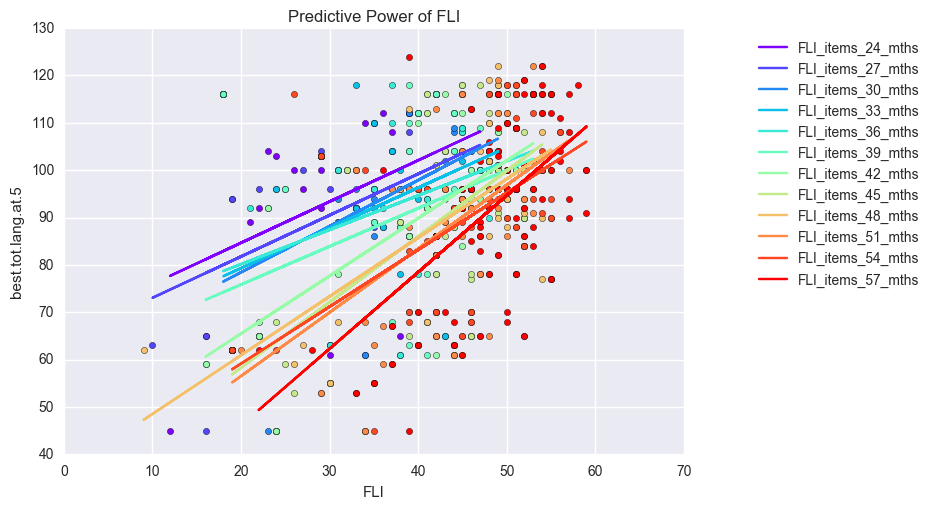

In [87]:
plot_scatters_together(fli_months, valid_list_to_plot, 'best.tot.lang.at.5')

The differing sample sizes are a result of some data challenges we faced in attempting to determine valid data points for clients who had acquired many FLI items at an unknown date. We determined the valid data points to be where the FLI count begins to change from a non-zero score. We use the FLI counts from 30 months onwards since the residual plots for FLI counts less than 30 months were not very symmetric, and so the linear models did not fit the data well.

**Summary Points of the Linear Models:**

•	We see by the coefficient of determination scores that the FLI scores at the 3-month intervals do not explain the variance in the language scores at 5 years of age very well. This is likely due to the variable nature of TSC’s work (the fact that poorly performing clients are identified and purposely worked with to improve scores) and the variability of situations and backgrounds of our clients. A more accurate predictive model will require variables in addition to FLI to be taken into account.

•	We do however see by the correlation coefficient that: **from 42 months onwards, there is a moderate to strong linear relationship between a client’s FLI score and their language score at 5 years of age. The p-values also indicate that there is significant evidence to suggest that there is indeed a linear relationship between FLI score and Language score at 5, and hence has good predictive validity.**


## Predicting Language at 4 years of age

We similarly construct simple linear regressions using cumulative FLI counts from 18 months to 45 months to predict language scores at 4 years of age.

In [76]:
# variables to predict language at 4
variables_for_4 = ['FLI_items_18_mths', 'FLI_items_21_mths', 'FLI_items_24_mths',
       'FLI_items_27_mths', 'FLI_items_30_mths', 'FLI_items_33_mths',
       'FLI_items_36_mths', 'FLI_items_39_mths', 'FLI_items_42_mths',
       'FLI_items_45_mths']

# get evenly spaced colour rainbow
colours_for_4 = cm.rainbow( np.linspace(0, 1, len(variables_for_4) ) )

data_list_for_4 = valid_list[5:15]

***********************************************************************************
FLI_items_18_mths
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.202
Date:                Wed, 22 Mar 2017   Prob (F-statistic):              0.283
Time:                        16:02:50   Log-Likelihood:                -117.18
No. Observations:                  28   AIC:                             238.4
Df Residuals:                      26   BIC:                             241.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

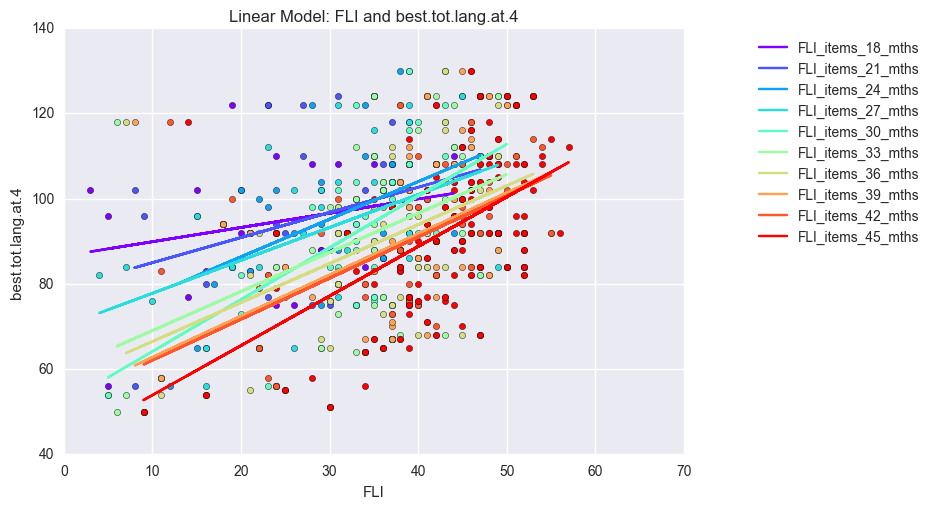

In [77]:
construct_regressions(variables_for_4, colours_for_4, data_list_for_4, 'best.tot.lang.at.4')

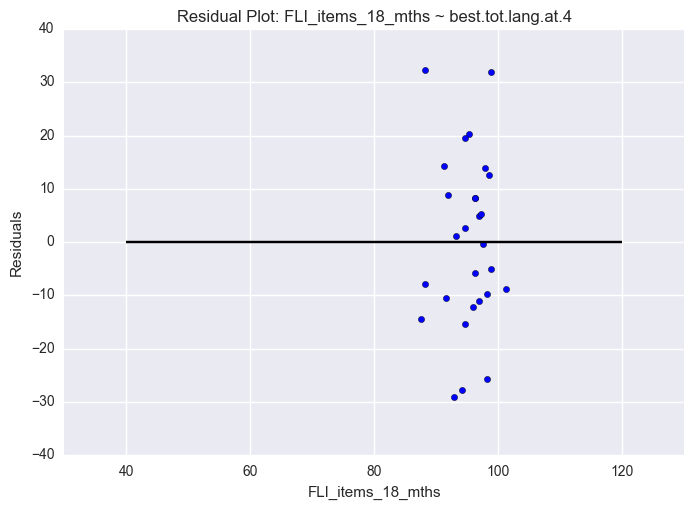

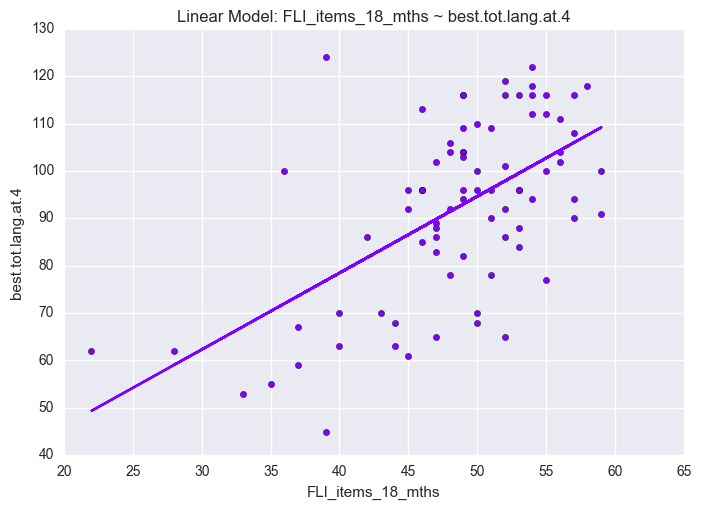

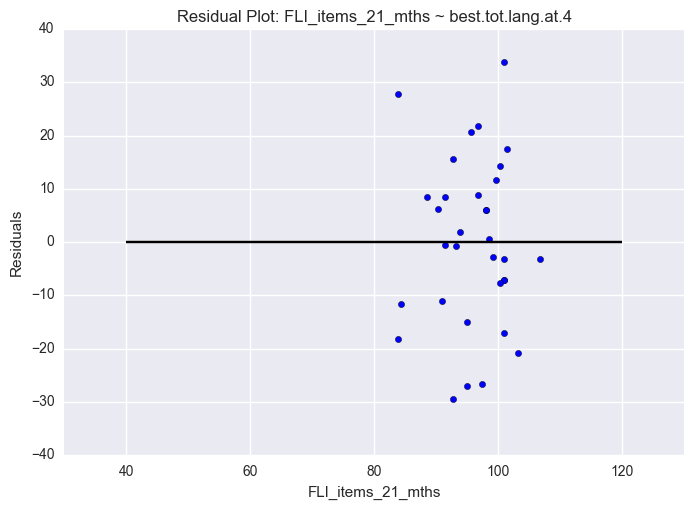

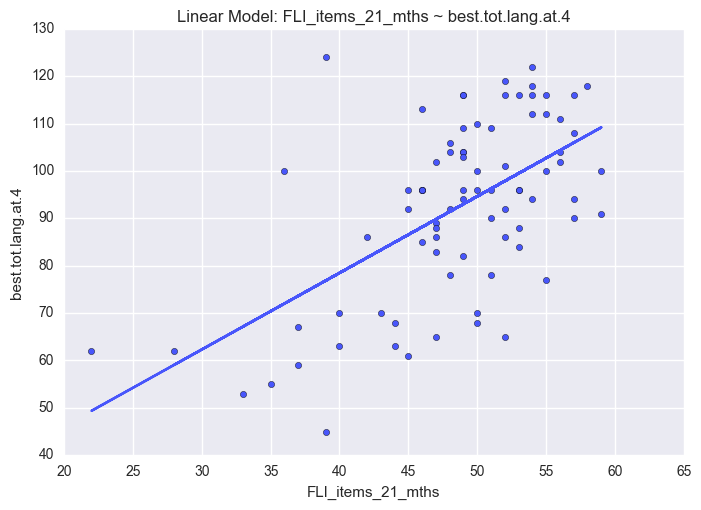

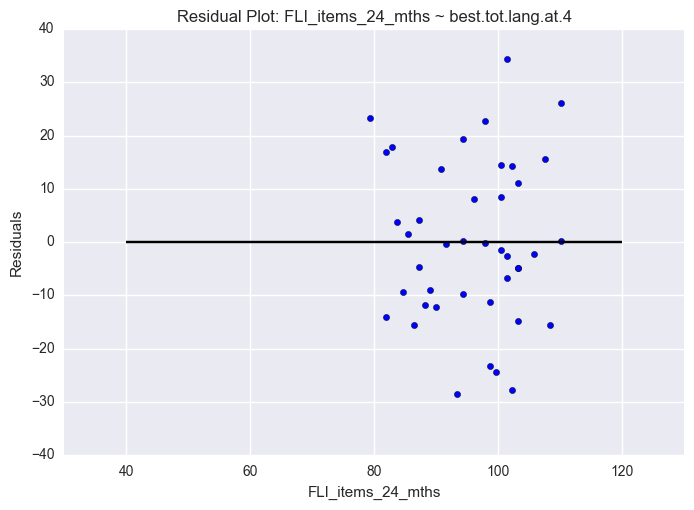

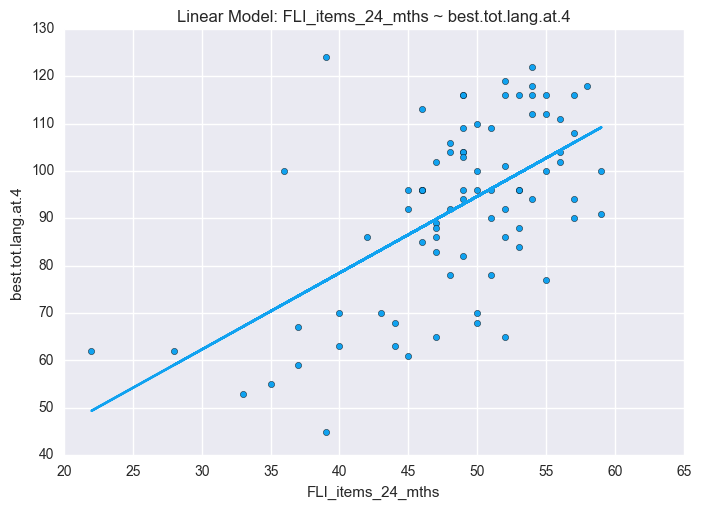

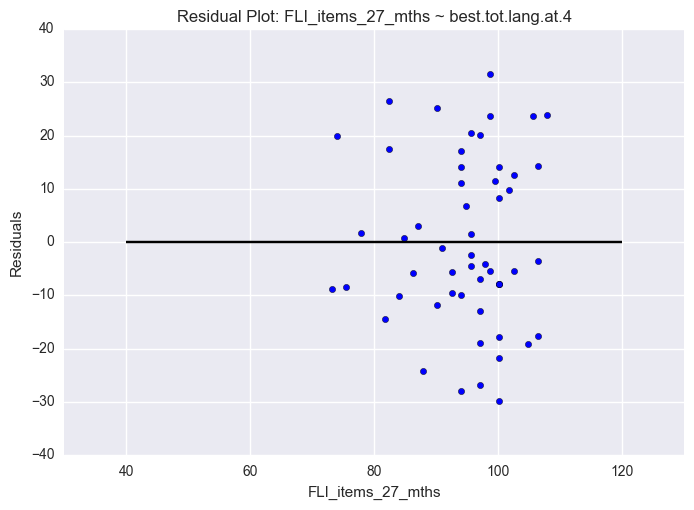

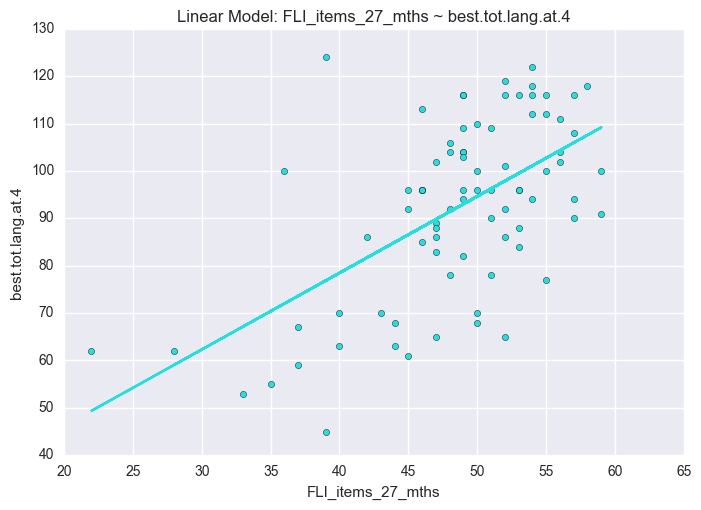

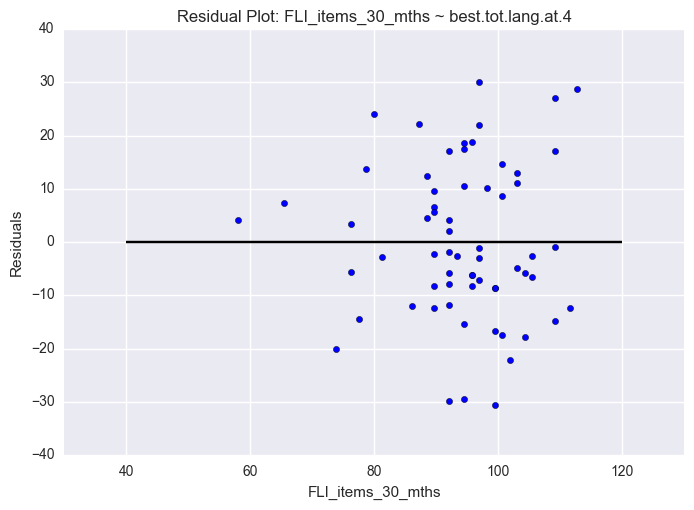

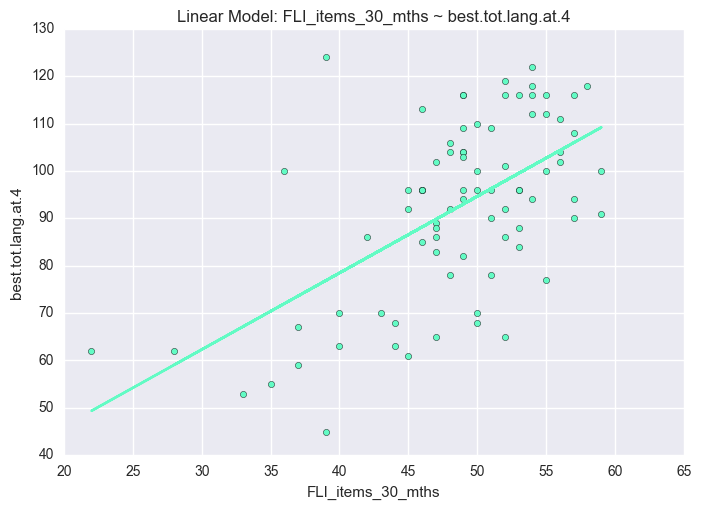

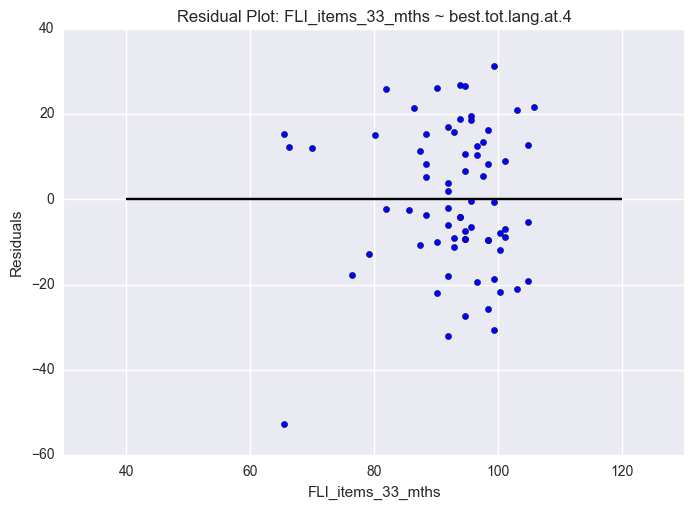

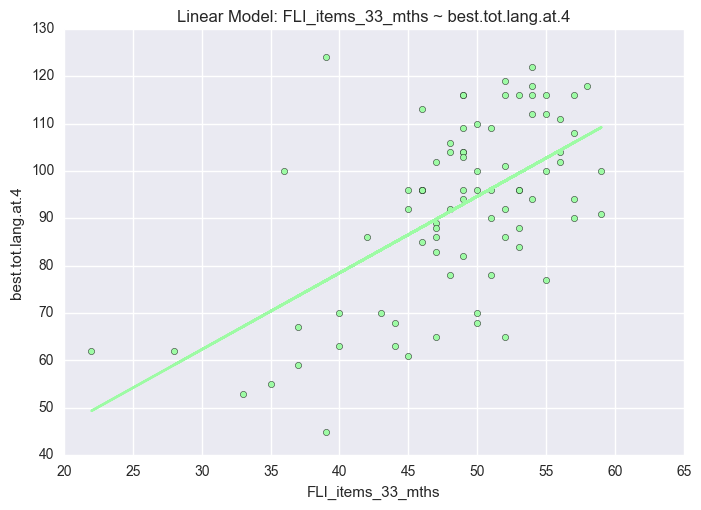

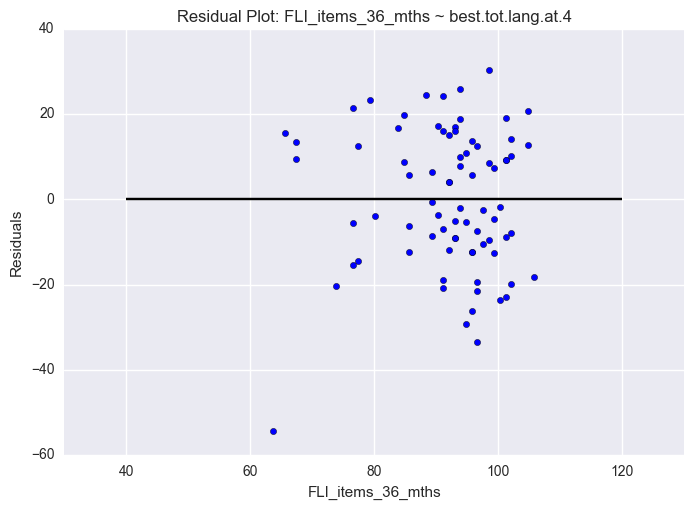

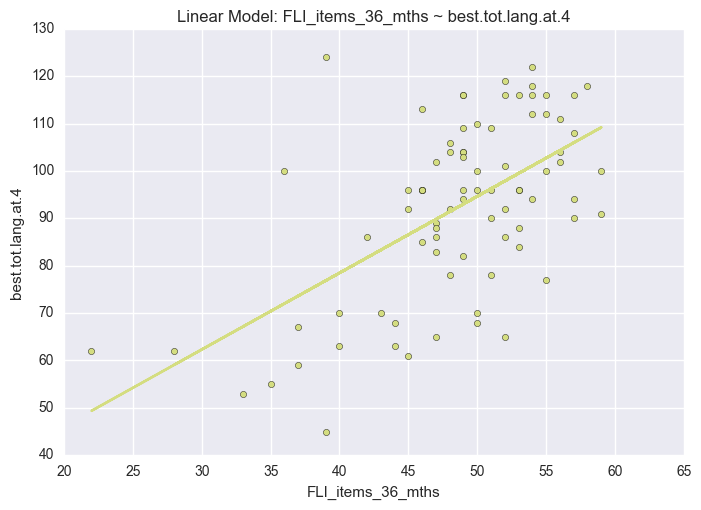

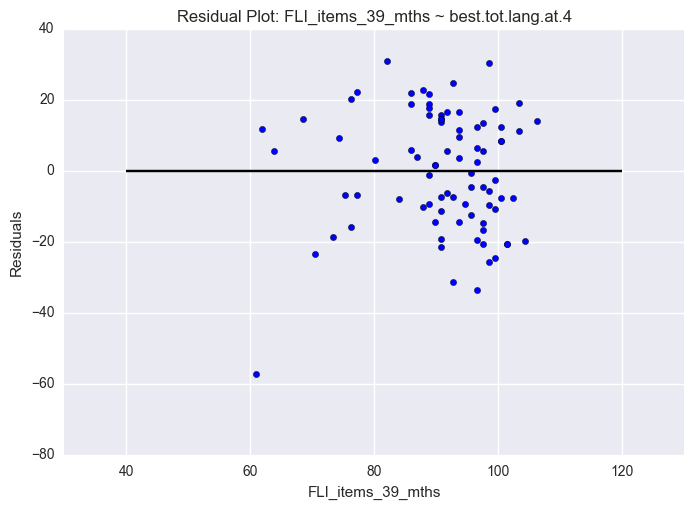

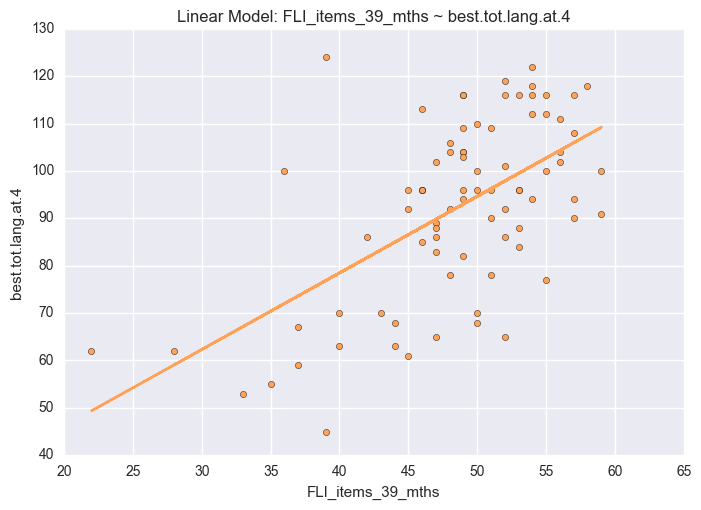

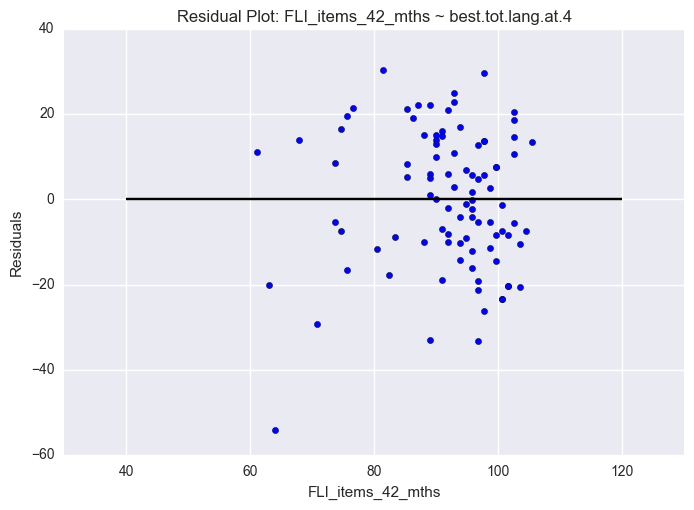

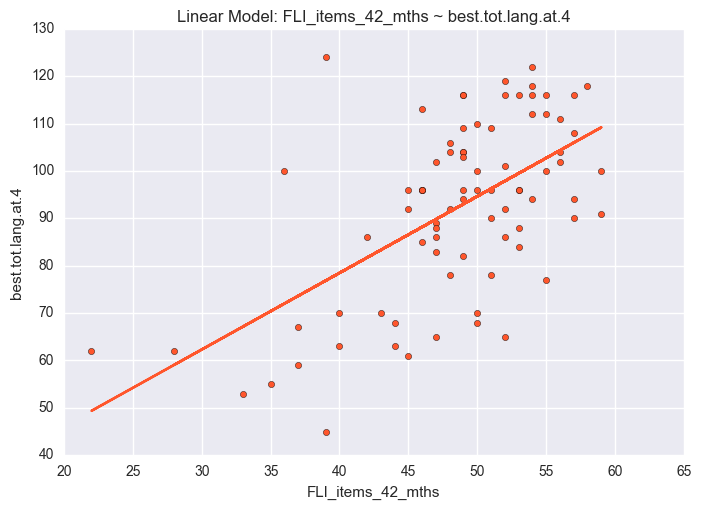

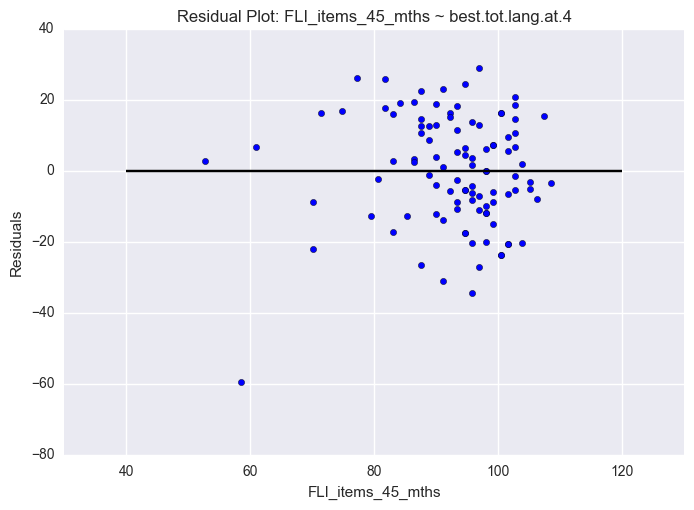

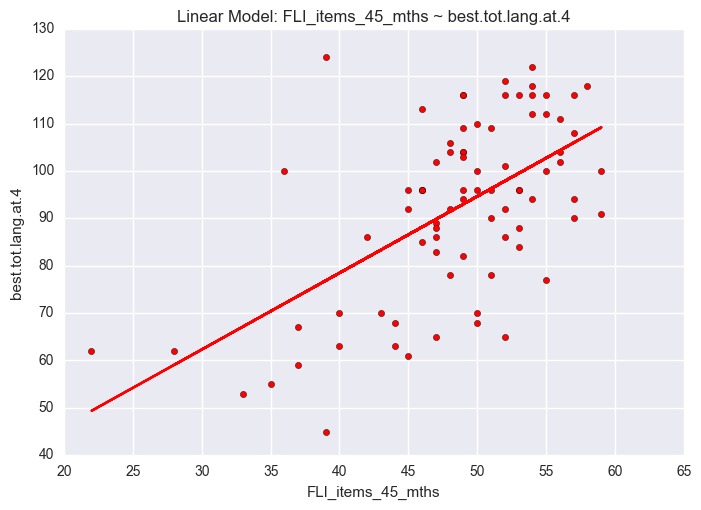

In [78]:
plot_regressions(variables_for_4, colours_for_4, data_list_for_4, 'best.tot.lang.at.4')

FLI_items_18_mths
FLI_items_21_mths
FLI_items_24_mths
FLI_items_27_mths
FLI_items_30_mths
FLI_items_33_mths
FLI_items_36_mths
FLI_items_39_mths
FLI_items_42_mths
FLI_items_45_mths


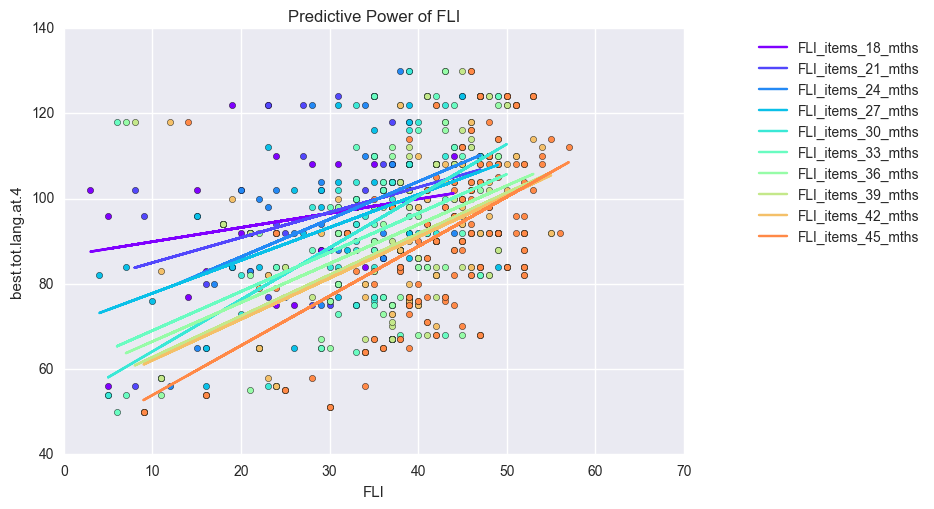

In [83]:
plot_scatters_together(variables_for_4, data_list_for_4, 'best.tot.lang.at.4')

It is encouraging to see that the linear fit in these models also become steeper as one’s age approaches 4.

**Summary Points of the Linear Models:**

The models are similar to the prediction of language at 5. The $p$-values of the coefficients and the moderate strength of the correlation imply that there is strong evidence to suggest that there is indeed a linear relationship between FLI scores and language score at 4. 

However, FLI on its own does not explain variances in language score well. 
This indicates that an enhanced predictive model will require other factors to be taken into account.


# Multiple Linear Regression

In [88]:
# select subset of clients where they have a lnaguage score at 5, did not pass swish.

valid_at_42 = pd.read_csv('S:/Clinical/Information & Analysis/Reports and Analysis/Research/FLI-P Validation Project/date filtered data/Valid_data_at_42months.csv')

# create columns for months between diagnosis and intervention and diagnosis and fit date 
valid_at_42['months_btw_diag_intervention'] = valid_at_42['MonthsAtIntervention'] - valid_at_42['MonthsAtDiagnosis']
valid_at_42['months_btw_diag_fit'] = valid_at_42['MonthsAtFitting'] - valid_at_42['MonthsAtDiagnosis']


In [89]:
valid_at_42.head()

,Unnamed: 0,PersonGUID,BirthDateTime,Child_Age_In_Months,age_group,age_in_months_at_last_update,FLI_items_0_mths,FLI_items_3_mths,FLI_items_6_mths,FLI_items_9_mths,...,fli_before_21,fli_before_24,fli_before_27,fli_before_30,fli_before_33,fli_before_36,fli_before_39,fli_before_42,months_btw_diag_intervention,months_btw_diag_fit
0,0,433B43F7-6928-47D8-8E97-002008D1BB7F,2013-08-05,38,37-48mths,23,11,11,11.0,12.0,...,True,True,True,True,True,True,True,True,0.0,5.0
1,2,A7CC2F8E-F002-4F58-BA02-00A1EB0E2DA3,2014-08-16,26,25-36mths,26,0,0,0.0,0.0,...,True,True,True,True,True,True,True,True,3.0,0.0


### Explore months between diagnosis and intervention variable

In [65]:
# get subset of dataset for which the months between diagnosis and intervention is not null and greater or equal to 0.
multi_regress_data = pd.merge(valid_at_42.loc[ ((valid_at_42['best.tot.lang.at.5'].notnull())
                                               & (valid_at_42['months_btw_diag_intervention'].notnull() )
                                               & (valid_at_42['months_btw_diag_intervention'] >= 0)), 
                                              ['PersonGUID', 'FLI_items_42_mths', 'HasAdditionalNeedsImpactedLearning', 
                                               'MonthsAtIntervention', 'months_btw_diag_intervention', 
                                               'months_btw_diag_fit', 'best.tot.lang.at.5' ]], 
                              df.loc[((df['newbornhearingresult']=='refer') & (df['best.tot.lang.at.5'].notnull())), ['PersonGUID']], 
                              how='left', left_on='PersonGUID', right_on='PersonGUID')

multi_regress_data.shape

(45, 7)

In [94]:
multi_regress_data['HasAdditionalNeedsImpactedLearning'].value_counts()

0    42
1     3
Name: HasAdditionalNeedsImpactedLearning, dtype: int64

In [67]:
# check out the data
qgrid.show_grid(multi_regress_data)

In [96]:
# Create regression datasets to test months btw diagnosis and intervention
X = multi_regress_data.loc[ multi_regress_data['HasAdditionalNeedsImpactedLearning']==0 , ['FLI_items_42_mths', 'months_btw_diag_intervention']]
X1 = sm.add_constant(X)
y = multi_regress_data.loc[multi_regress_data['HasAdditionalNeedsImpactedLearning']==0, 'best.tot.lang.at.5']

# multiple regression model
multi_model = sm.OLS(y,X1)
multi_model_result = multi_model.fit()
print(multi_model_result.summary())

                            OLS Regression Results                            
Dep. Variable:     best.tot.lang.at.5   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     5.567
Date:                Wed, 18 Jan 2017   Prob (F-statistic):            0.00747
Time:                        11:42:13   Log-Likelihood:                -184.85
No. Observations:                  42   AIC:                             375.7
Df Residuals:                      39   BIC:                             380.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

When we consider clients without additional needs, using the variables **months between diagnosis and intervention date and FLI** slightly improves the model fit. Let's see if there is a relationship between FLI_42_mths and months_btw_diag_intervention.

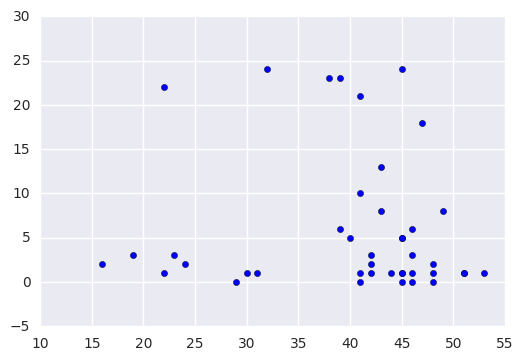

In [97]:
x1 = multi_regress_data.loc[multi_regress_data['HasAdditionalNeedsImpactedLearning']==0,['FLI_items_42_mths']]
y1 = multi_regress_data.loc[multi_regress_data['HasAdditionalNeedsImpactedLearning']==0,['months_btw_diag_intervention']]
plt.scatter(x=x1, y=y1)

So there does not appear to be a relationship between FLI at 42 months and Months between diagnosis and intervention.

### Explore months between diagnosis and fit variable

In [98]:
# get subset of dataset for which the months between diagnosis and intervention is not null and greater or equal to 0.
multi_regress_data = pd.merge(valid_at_42.loc[ ((valid_at_42['best.tot.lang.at.5'].notnull())
                                               & (valid_at_42['months_btw_diag_fit'].notnull() )
                                               & (valid_at_42['months_btw_diag_fit'] >= 0)), 
                                              ['PersonGUID', 'FLI_items_42_mths', 'HasAdditionalNeedsImpactedLearning', 
                                               'MonthsAtIntervention', 'months_btw_diag_intervention', 
                                               'months_btw_diag_fit', 'best.tot.lang.at.5' ]], 
                              df.loc[((df['newbornhearingresult']=='refer') & (df['best.tot.lang.at.5'].notnull())), ['PersonGUID']], 
                              how='left', left_on='PersonGUID', right_on='PersonGUID')

qgrid.show_grid(multi_regress_data)

In [99]:
# Create regression datasets to test months btw diagnosis and intervention
X = multi_regress_data.loc[multi_regress_data['HasAdditionalNeedsImpactedLearning']==0, ['FLI_items_42_mths', 'months_btw_diag_fit']]
X1 = sm.add_constant(X)
y = multi_regress_data.loc[multi_regress_data['HasAdditionalNeedsImpactedLearning']==0, 'best.tot.lang.at.5']

# multiple regression model
multi_model = sm.OLS(y,X1)
multi_model_result = multi_model.fit()
print(multi_model_result.summary())

                            OLS Regression Results                            
Dep. Variable:     best.tot.lang.at.5   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     7.189
Date:                Wed, 18 Jan 2017   Prob (F-statistic):            0.00230
Time:                        11:47:23   Log-Likelihood:                -174.35
No. Observations:                  40   AIC:                             354.7
Df Residuals:                      37   BIC:                             359.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  47.5220    

There appears to be a slightly more significant relationship between months between diagnosis and fit date on language score at 5. But does it make sense that if we hold FLI at 42 months fixed, then having an implant later will actually increase your FLI?

This might make sense, as it might mean that the client has greater ability, since they have caught up on the FLI faster? 

In [100]:
# Create regression dataset to test only months btw diagnosis and fit
X = multi_regress_data.loc[multi_regress_data['HasAdditionalNeedsImpactedLearning']==0, ['months_btw_diag_fit']]
X1 = sm.add_constant(X)
y = multi_regress_data.loc[multi_regress_data['HasAdditionalNeedsImpactedLearning']==0, 'best.tot.lang.at.5']

# multiple regression model
multi_model = sm.OLS(y,X1)
multi_model_result = multi_model.fit()
print(multi_model_result.summary())

                            OLS Regression Results                            
Dep. Variable:     best.tot.lang.at.5   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     6.497
Date:                Wed, 18 Jan 2017   Prob (F-statistic):             0.0150
Time:                        11:53:44   Log-Likelihood:                -177.76
No. Observations:                  40   AIC:                             359.5
Df Residuals:                      38   BIC:                             362.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  82.2419    

Now this is not making a whole lot of sense. I would expect an inverse relationship between months between diagnosis and fit and language score at 5.

### Explore additional needs variable

In [102]:
# fit multi-regression model
X = multi_regress_data.loc[:, ['FLI_items_42_mths', 'HasAdditionalNeedsImpactedLearning']]
X1 = sm.add_constant(X)
y = multi_regress_data.loc[:, 'best.tot.lang.at.5']

# multiple regression model

multi_model = sm.OLS(y,X1)
multi_model_result = multi_model.fit()
print(multi_model_result.summary())

                            OLS Regression Results                            
Dep. Variable:     best.tot.lang.at.5   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     3.265
Date:                Wed, 18 Jan 2017   Prob (F-statistic):             0.0486
Time:                        13:26:46   Log-Likelihood:                -190.41
No. Observations:                  43   AIC:                             386.8
Df Residuals:                      40   BIC:                             392.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

The additional needs impacted learning variable doesn't add much to the model - this is probably because additional needs and FLI are well correlated, so we get a confounding effect.

**Summary of brief multiple linear regression findings**

Exploring a few additional variables as a predictor, such as months between diagnosis of hearing loss and obtaining a device as well as months between diagnosis and receiving intervention help, improves our predictive models only slightly. Given the complex circumstances and nature of The Shepherd Centre's work, it makes sense that performance in language assessment cannot accurately be captured in a linear model.